In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import matplotlib.pyplot as plt
import random
import numpy as np

## initialize `G_baseline` network with weights added

In [13]:
random.seed(1)
np.random.seed(1)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1220	(0.0010 from target)
10-19: 0.1420	(0.0110 from target)
20-29: 0.1500	(0.0130 from target)
30-39: 0.1260	(-0.0070 from target)
40-49: 0.1010	(-0.0230 from target)
50-59: 0.1270	(-0.0040 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0870	(0.0170 from target)
80+: 0.0430	(0.0050 from target)

Generated household size distribution:
1: 0.2758	(-0.0079 from target)
2: 0.3351	(-0.0101 from target)
3: 0.1263	(-0.0244 from target)
4: 0.1314	(0.0038 from target)
5: 0.0747	(0.0170 from target)
6: 0.0438	(0.0212 from target)
7: 0.0129	(0.0004 from target)
Num households: 388
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 20-59...
Generating graph for 60+...


In [6]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## correlated pooling with artificially high edge weights

In [14]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    transition_mode="time_in_state",
    initE = INIT_EXPOSED)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 100,
    num_groups = 10,
    pool_size = 30,
    LoD=174,
    seed = 0,
    save_results=False,
    # save_results=True,
    # output_path="home/yz685/corr_pooling_seirsplus/results/test_save_CP",
    max_dt=0.01,
)

# sim_correlated.model.G = sim_correlated.model.G_weighted

sim_correlated.run_simulation()

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 740 is transitioning EtoIPRE at time 1.010003081381798 with timer_state: [1.01000308]; 1/sigma: [1.00930038]; VL: 0.0
{'t': 1.010003081381798, 'transitionNode': 740, 'transitionNodeVL': 8.78452442477977, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
{'t': 1.0100030813943517, 'transitionNode': 739, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 2499999999.75, sum of all propensities: 4999999999.5
{'t': 1.0100030813944283, 'transitionNode': 114, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 2499999999.75, sum of all propensities: 2499999999.75
-- node 314 is transitioning EtoIPRE at time 1.1500343226360694 with timer_state: [1.15003432]; 1/sigma: [1.1414417]; VL: 5.3104784945270955
{'t': 1.1500343226360694, 'transitionNode': 314, 'transitionNodeVL': 6.001567429012347, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.00000000003
{'t': 1.1500343228539927, 'transitionNode': 15, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.07it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 857 is transitioning EtoIPRE at time 2.480063545357876 with timer_state: [2.48006355]; 1/sigma: [2.47955085]; VL: 3.671506961970832
{'t': 2.480063545357876, 'transitionNode': 857, 'transitionNodeVL': 5.1142602971108735, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.27599574151
{'t': 2.4800635453732536, 'transitionNode': 445, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 2499999998.625, sum of all propensities: 4999999996.906372
{'t': 2.4800635455049505, 'transitionNode': 446, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 2499999998.0, sum of all propensities: 2499999998.281372
-- node 807 is transitioning EtoIPRE at time 2.520063836087505 with timer_state: [2.52006384]; 1/sigma: [2.51714146]; VL: 9.653494881749294
{'t': 2.520063836087505, 'transitionNode': 807, 'transitionNodeVL': 9.79781839449879, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.28137208574
{'t': 2.52006383

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.59it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 925 is transitioning EtoIPRE at time 3.070139739503127 with timer_state: [1.86010291]; 1/sigma: [1.85263688]; VL: 8.660532955712172
{'t': 3.070139739503127, 'transitionNode': 925, 'transitionNodeVL': 9.723595966502245, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.29212477535
-- node 316 is transitioning EtoIPRE at time 3.110142535659283 with timer_state: [1.96010821]; 1/sigma: [1.95735557]; VL: 9.276749277277162
{'t': 3.110142535659283, 'transitionNode': 316, 'transitionNodeVL': 9.456718726570257, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.29212477563
-- node 927 is transitioning EtoIPRE at time 3.3301612473464783 with timer_state: [2.12012442]; 1/sigma: [2.1176281]; VL: 6.86083265961177
{'t': 3.3301612473464783, 'transitionNode': 927, 'transitionNodeVL': 7.646254618592979, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.29212477616
-- node 338 is transitioning EtoIP

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.47it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 671 is transitioning EtoIPRE at time 4.000251884991839 with timer_state: [1.30013956]; 1/sigma: [1.29796179]; VL: 7.8052337405522225
{'t': 4.000251884991839, 'transitionNode': 671, 'transitionNodeVL': 7.852561318917688, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.75956277465
-- node 317 is transitioning EtoIPRE at time 4.060258827369799 with timer_state: [1.3901631]; 1/sigma: [1.38082625]; VL: 8.090912341592077
{'t': 4.060258827369799, 'transitionNode': 317, 'transitionNodeVL': 8.399122202546078, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.29289610799
{'t': 4.085358812963831, 'transitionNode': 532, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.0625, sum of all propensities: 1.5268246797879415
-- node 15 is transitioning EtoIPRE at time 4.125378595486761 with timer_state: [2.97534427]; 1/sigma: [2.96909847]; VL: 9.3347779652518
{'t': 4.125378595486761, 'transitionNode': 15, 'transiti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.17it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 5.048195894287965, 'transitionNode': 370, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.02, sum of all propensities: 1.485640267175494
-- node 315 is transitioning EtoIPRE at time 5.0682048720593365 with timer_state: [2.39810915]; 1/sigma: [2.38857229]; VL: 7.688156326402562
{'t': 5.0682048720593365, 'transitionNode': 315, 'transitionNodeVL': 7.722011641267218, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.62119582306
-- node 397 is transitioning EtoIPRE at time 5.098206092220759 with timer_state: [2.42810306]; 1/sigma: [2.42750895]; VL: 5.56796651111363
{'t': 5.098206092220759, 'transitionNode': 397, 'transitionNodeVL': 5.636244586166052, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.96665402068
-- node 807 is transitioning IPREtoISYM at time 5.108208663814819 with timer_state: [2.58814483]; 1/lamda: [2.57896111]; VL: 9.796686909491957
{'t': 5.108208663814819, 'transitionNode': 807, 'tra

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.01it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 6.0200103632945785, 'transitionNode': 779, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03763440860215054, sum of all propensities: 1.9006017948891523
{'t': 6.067239671781537, 'transitionNode': 502, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05555555555555555, sum of all propensities: 1.8629673862870018
-- node 532 is transitioning EtoIPRE at time 6.387242595179835 with timer_state: [2.30188378]; 1/sigma: [2.29944437]; VL: 6.523978308802381
{'t': 6.387242595179835, 'transitionNode': 532, 'transitionNodeVL': 7.569337552445354, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.80741183073
-- node 927 is transitioning QPREtoQSYM at time 6.447248681816538 with timer_state: [3.11708743]; 1/lamda: [3.11232887]; VL: 7.646254618592979
{'t': 6.447248681816538, 'transitionNode': 927, 'transitionNodeVL': 7.644217919195091, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100001.907411830

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.91it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 370 is transitioning EtoIPRE at time 7.201506987990367 with timer_state: [2.15331109]; 1/sigma: [2.15024836]; VL: 7.174731429400144
{'t': 7.201506987990367, 'transitionNode': 370, 'transitionNodeVL': 8.461301672783526, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.40741183083
-- node 899 is transitioning IPREtoISYM at time 7.211508262646066 with timer_state: [1.81903689]; 1/lamda: [1.81161978]; VL: 5.364623801451168
{'t': 7.211508262646066, 'transitionNode': 899, 'transitionNodeVL': 5.361428968469541, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100001.59812627672
-- node 445 is transitioning QPREtoQSYM at time 7.281523061036866 with timer_state: [3.55134046]; 1/lamda: [3.54719096]; VL: 6.775339219288734
{'t': 7.281523061036866, 'transitionNode': 445, 'transitionNodeVL': 6.7709757827009485, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100001.59812627672
-- node 880 is transi

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.09it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 446 is transitioning QPREtoQSYM at time 8.00315199473581 with timer_state: [3.74500911]; 1/lamda: [3.74242944]; VL: 9.570139525827383
{'t': 8.00315199473581, 'transitionNode': 446, 'transitionNodeVL': 9.568003878243397, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100001.6477294516
-- node 805 is transitioning IPREtoISYM at time 8.163172223605038 with timer_state: [4.34297156]; 1/lamda: [4.3420231]; VL: 9.387105593811814
{'t': 8.163172223605038, 'transitionNode': 805, 'transitionNodeVL': 9.38625901688502, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100001.6477294516
-- node 399 is transitioning IPREtoISYM at time 8.193181876048525 with timer_state: [4.30294568]; 1/lamda: [4.29631082]; VL: 8.41640278853563
{'t': 8.193181876048525, 'transitionNode': 399, 'transitionNodeVL': 8.41108260934912, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100001.6477294516
-- node 898 is transition

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.45it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 532 is transitioning IPREtoISYM at time 9.38325131828167 with timer_state: [2.99600872]; 1/lamda: [2.98991143]; VL: 7.569337552445354
{'t': 9.38325131828167, 'transitionNode': 532, 'transitionNodeVL': 7.566368568624853, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100002.03048558767
-- node 370 is transitioning IPREtoISYM at time 9.413252249383609 with timer_state: [2.21174526]; 1/lamda: [2.20578156]; VL: 8.461301672783526
{'t': 9.413252249383609, 'transitionNode': 370, 'transitionNodeVL': 8.456906141740728, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100002.03048558767
-- node 730 is transitioning EtoIPRE at time 9.533257972805574 with timer_state: [2.73177735]; 1/sigma: [2.73119551]; VL: 8.082690917424495
{'t': 9.533257972805574, 'transitionNode': 730, 'transitionNodeVL': 8.452273876393457, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.03048558767
-- node 778 is transitio

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.81it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 502 is transitioning IPREtoISYM at time 10.349803724159479 with timer_state: [2.87819758]; 1/lamda: [2.87433853]; VL: 7.747364911620353
{'t': 10.349803724159479, 'transitionNode': 502, 'transitionNodeVL': 7.742268481679254, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100001.82952404922
-- node 363 is transitioning EtoIPRE at time 10.619805605650031 with timer_state: [2.77667059]; 1/sigma: [2.77414485]; VL: 8.481607633563865
{'t': 10.619805605650031, 'transitionNode': 363, 'transitionNodeVL': 9.386644508968395, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.82952404922
-- node 431 is transitioning EtoIPRE at time 10.659831551947429 with timer_state: [2.99443662]; 1/sigma: [2.98906206]; VL: 5.546884076826345
{'t': 10.659831551947429, 'transitionNode': 431, 'transitionNodeVL': 5.611941792183638, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.01841293827
-- node 880 is transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.01it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 11.009844136914994, 'transitionNode': 857, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.01841293841
{'t': 11.019844285326888, 'transitionNode': 314, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 600002.0184129382
-- node 202 is transitioning ISYMtoR at time 11.019849755714894 with timer_state: [6.57169224]; 1/gamma: [6.56390857]; VL: -1.0
{'t': 11.019849755714894, 'transitionNode': 202, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 500001.8335977525
{'t': 11.019851048701202, 'transitionNode': 840, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 400001.83359775244
{'t': 11.01985153916789, 'transitionNode': 926, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 300001.83359775215
{'t': 11.019851876172

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.87it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 12.028740368015743, 'transitionNode': 739, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.66494695834
{'t': 12.08820759483821, 'transitionNode': 855, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.14285714285714285, sum of all propensities: 1.6649469583104084
-- node 447 is transitioning EtoIPRE at time 12.338215120700614 with timer_state: [2.49731881]; 1/sigma: [2.49413294]; VL: 8.486410036171108
{'t': 12.338215120700614, 'transitionNode': 447, 'transitionNodeVL': 9.418470421607056, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.52208981545
-- node 297 is transitioning EtoIPRE at time 12.498219199478955 with timer_state: [2.62114191]; 1/sigma: [2.61155124]; VL: 5.191190408366563
{'t': 12.498219199478955, 'transitionNode': 297, 'transitionNodeVL': 5.5084520418088445, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.66983417672
-- n

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.08it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 497 is transitioning EtoIPRE at time 13.328276930359236 with timer_state: [1.95472866]; 1/sigma: [1.95062766]; VL: 6.432601459311482
{'t': 13.328276930359236, 'transitionNode': 497, 'transitionNodeVL': 7.723115675867055, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.85321697129
{'t': 13.488282419880811, 'transitionNode': 445, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.8759442441
{'t': 13.538285725189375, 'transitionNode': 337, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.85671347466
{'t': 13.55828754300703, 'transitionNode': 118, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.85671347436
{'t': 13.678288213532937, 'transitionNode': 397, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.856713

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.16it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 14.073276566551058, 'transitionNode': 374, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.07142857142857142, sum of all propensities: 1.794213473672269
-- node 855 is transitioning QEtoQPRE at time 14.193276839200138 with timer_state: [2.10506924]; 1/sigma: [2.10189288]; VL: 6.450238960078961
{'t': 14.193276839200138, 'transitionNode': 855, 'transitionNodeVL': 6.8298439772404445, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100001.72278490225
-- node 524 is transitioning QPREtoQSYM at time 14.23330234248143 with timer_state: [3.1034434]; 1/lamda: [3.09559652]; VL: 8.559230314054272
{'t': 14.23330234248143, 'transitionNode': 524, 'transitionNodeVL': 8.555426199018784, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100001.77278490242
-- node 447 is transitioning QPREtoQSYM at time 14.323309603441801 with timer_state: [1.98509448]; 1/lamda: [1.97994878]; VL: 9.418470421607056
{'t': 14.323309603441801, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.40it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 374 is transitioning EtoIPRE at time 15.298796406983795 with timer_state: [1.22551984]; 1/sigma: [1.22353012]; VL: 3.1569497557742063
{'t': 15.298796406983795, 'transitionNode': 374, 'transitionNodeVL': 5.803944911012006, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.57278490241
{'t': 15.45880282622815, 'transitionNode': 807, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.57278490254
{'t': 15.785184484242905, 'transitionNode': 384, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.045454545454545456, sum of all propensities: 1.572784902016198
-- node 340 is transitioning EtoIPRE at time 15.835184875242579 with timer_state: [1.25474967]; 1/sigma: [1.24657356]; VL: 5.178983566937747
{'t': 15.835184875242579, 'transitionNode': 340, 'transitionNodeVL': 5.358778026075946, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.52733035656
{'t'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.84it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 16.433228805604337, 'transitionNode': 254, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.43537691535
-- node 861 is transitioning EtoIPRE at time 16.68323437998503 with timer_state: [2.69108378]; 1/sigma: [2.68608217]; VL: 7.275984718664165
{'t': 16.68323437998503, 'transitionNode': 861, 'transitionNodeVL': 8.006254276806938, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.43537691532
{'t': 16.923240552993338, 'transitionNode': 740, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.43537691556


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 76.83it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 585 is transitioning EtoIPRE at time 17.02324406586018 with timer_state: [1.04003099]; 1/sigma: [1.03633017]; VL: 8.521931481199207
{'t': 17.02324406586018, 'transitionNode': 585, 'transitionNodeVL': 9.394975043580864, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.43537691553
{'t': 17.043244981022173, 'transitionNode': 779, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.43537691559
{'t': 17.063250197555043, 'transitionNode': 728, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.23714458963
-- node 497 is transitioning QPREtoQSYM at time 17.12325058481193 with timer_state: [3.79497365]; 1/lamda: [3.78938707]; VL: 7.723115675867055
{'t': 17.12325058481193, 'transitionNode': 497, 'transitionNodeVL': 7.718963270438788, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100001.2371445896
-- node 8

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.37it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 18.05280672834364, 'transitionNode': 927, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.97890773341
{'t': 18.122809345701814, 'transitionNode': 752, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.8789077332
{'t': 18.232811055257663, 'transitionNode': 398, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.87890773319
{'t': 18.42281958487501, 'transitionNode': 805, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.87890773294
{'t': 18.66283676602836, 'transitionNode': 806, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.8789077322
{'t': 18.682863015744893, 'transitionNode': 431, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.78it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 19.00967220054786, 'transitionNode': 315, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.83724106438
{'t': 19.01968329748913, 'transitionNode': 898, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.76537871535
{'t': 19.10968784533913, 'transitionNode': 532, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.76537871531
{'t': 19.14968934297376, 'transitionNode': 399, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.7653787152
{'t': 19.359693983024574, 'transitionNode': 753, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.76537871493
-- node 861 is transitioning IPREtoISYM at time 19.529705983506624 with timer_state: [2.8464716]; 1/lamda: [2.84335835]; VL: 8.006254276806938
{'t': 1

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.20it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 585 is transitioning IPREtoISYM at time 20.28973715654038 with timer_state: [3.26649309]; 1/lamda: [3.25697819]; VL: 9.394975043580864
{'t': 20.28973715654038, 'transitionNode': 585, 'transitionNodeVL': 9.388027995443032, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100000.85704538164
-- node 388 is transitioning EtoIPRE at time 20.78975149021843 with timer_state: [1.98009002]; 1/sigma: [1.9795791]; VL: 5.071328476548459
{'t': 20.78975149021843, 'transitionNode': 388, 'transitionNodeVL': 6.782826005862224, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.85704538164
{'t': 20.89975918843229, 'transitionNode': 297, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100001.0075621777
{'t': 20.999762184510672, 'transitionNode': 778, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.81119237049


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.05it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 21.019783896678913, 'transitionNode': 318, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.8111923695
-- node 384 is transitioning IPREtoISYM at time 21.359784659911732 with timer_state: [3.54698608]; 1/lamda: [3.53720632]; VL: 6.94725399256789
{'t': 21.359784659911732, 'transitionNode': 384, 'transitionNodeVL': 6.9400827646798895, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100000.81119236888
{'t': 21.519790721625622, 'transitionNode': 880, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.81119236888


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 33.67it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 22.019805737852717, 'transitionNode': 370, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.75563681325
-- node 608 is transitioning IPREtoISYM at time 22.159815963874888 with timer_state: [2.42008196]; 1/lamda: [2.41529711]; VL: 7.93697192825176
{'t': 22.159815963874888, 'transitionNode': 608, 'transitionNodeVL': 7.932234124732998, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100000.5997781366
{'t': 22.249818234017415, 'transitionNode': 730, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.5997781366
{'t': 22.319828383381065, 'transitionNode': 502, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.5997781366
-- node 388 is transitioning IPREtoISYM at time 22.919831467543457 with timer_state: [2.13007998]; 1/lamda: [2.12324263]; VL: 6.782826005862224
{'t': 22.91983146

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.37it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 23.09984150917407, 'transitionNode': 855, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.59977813641
{'t': 23.289849740684605, 'transitionNode': 363, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.54977813624


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 79.05it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 25.089850418235915, 'transitionNode': 374, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.50255591384
{'t': 25.49550287524347, 'transitionNode': 519, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.125, sum of all propensities: 0.5025559137205384
{'t': 25.59551382368581, 'transitionNode': 340, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.37755591371
{'t': 25.725517267102216, 'transitionNode': 524, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.26950935493
{'t': 25.755524218106764, 'transitionNode': 677, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.26950935488


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.91it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 26.475530515849822, 'transitionNode': 447, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.25562046595
{'t': 26.795531816029303, 'transitionNode': 384, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.2293046761


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.51it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 27.135534923361924, 'transitionNode': 497, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.15051679683
{'t': 27.71553840525303, 'transitionNode': 849, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.15051679676
-- node 519 is transitioning EtoIPRE at time 27.795541930490618 with timer_state: [2.30003906]; 1/sigma: [2.29091298]; VL: 9.68990833142666
{'t': 27.795541930490618, 'transitionNode': 519, 'transitionNodeVL': 9.999270946937317, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.1505167964


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.33it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 29.825546836610087, 'transitionNode': 388, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.15051679644


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.25it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

-- node 519 is transitioning IPREtoISYM at time 30.295548934804142 with timer_state: [2.500007]; 1/lamda: [2.49839164]; VL: 9.999270946937317
{'t': 30.295548934804142, 'transitionNode': 519, 'transitionNodeVL': 9.991860610422046, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100000.00000000038
{'t': 30.375552031213477, 'transitionNode': 861, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.00000000038


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.11it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 31.005552495996287, 'transitionNode': 585, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.00000000016


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.41it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 32.73557841987242, 'transitionNode': 608, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.00000000009


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.29it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 42.07558664060218, 'transitionNode': 519, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100000.00000000003


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.07it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

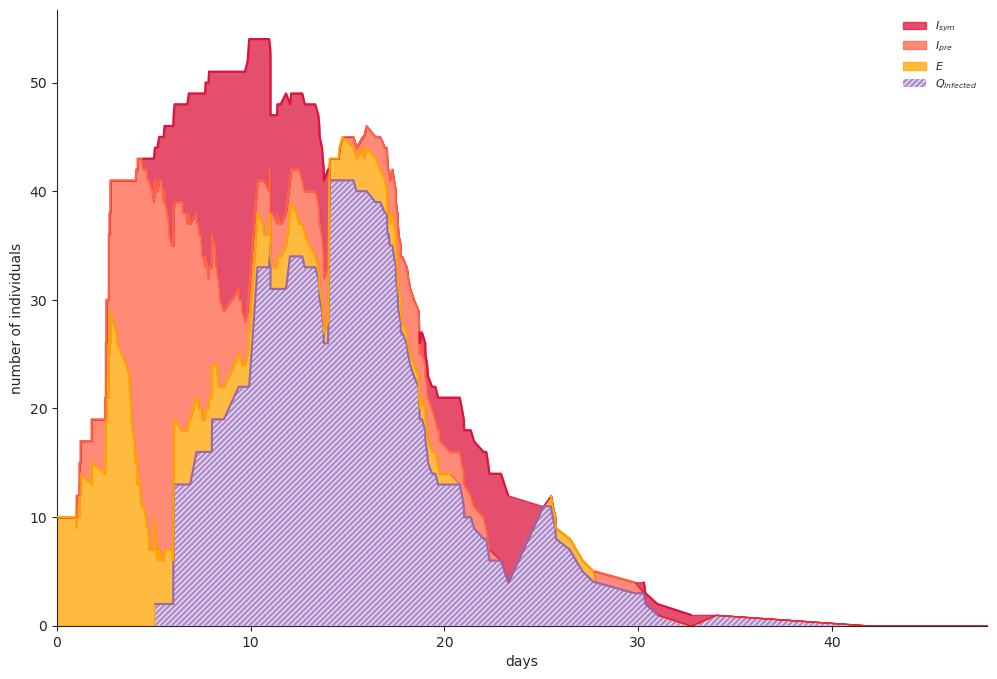

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [32]:
sim_correlated.model.figure_infections(plot_percentages=False)

Text(0.5, 1.0, 'With weighted edges')

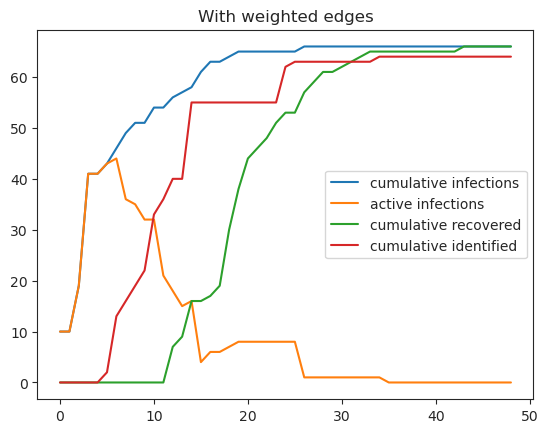

In [33]:
plt.plot([sim_correlated.overall_results[i]["cumInfections"] for i in range(len(sim_correlated.overall_results))], label="cumulative infections")
plt.plot([sim_correlated.overall_results[i]["numActiveInfections"] for i in range(len(sim_correlated.overall_results))], label="active infections")
plt.plot([sim_correlated.overall_results[i]["cumRecovered"] for i in range(len(sim_correlated.overall_results))], label="cumulative recovered")
plt.plot([sim_correlated.overall_results[i]["cum_positives_identified"] for i in range(len(sim_correlated.overall_results))], label="cumulative identified")

plt.legend()
plt.title("With weighted edges")

# Correlated pooling without artifically weighted edges

In [30]:
random.seed(1)
np.random.seed(1)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']

test_model_2 = ViralExtSEIRNetworkModel(
    G = G,
    # beta = 0.5,
    beta = 0.2,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    transition_mode="time_in_state",
    initE = INIT_EXPOSED)

sim_correlated_2 = SimulationRunner(
    model=test_model_2,
    pooling_strategy='correlated',
    T = 100,
    num_groups = 10,
    pool_size = 30,
    LoD=174,
    seed = 0,
    save_results=False,
    # save_results=True,
    # output_path="home/yz685/corr_pooling_seirsplus/results/test_save_CP",
    max_dt=0.01,
)

# sim_correlated.model.G = sim_correlated.model.G_weighted

sim_correlated_2.run_simulation()

Generated overall age distribution:
0-9: 0.1220	(0.0010 from target)
10-19: 0.1420	(0.0110 from target)
20-29: 0.1500	(0.0130 from target)
30-39: 0.1260	(-0.0070 from target)
40-49: 0.1010	(-0.0230 from target)
50-59: 0.1270	(-0.0040 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0870	(0.0170 from target)
80+: 0.0430	(0.0050 from target)

Generated household size distribution:
1: 0.2758	(-0.0079 from target)
2: 0.3351	(-0.0101 from target)
3: 0.1263	(-0.0244 from target)
4: 0.1314	(0.0038 from target)
5: 0.0747	(0.0170 from target)
6: 0.0438	(0.0212 from target)
7: 0.0129	(0.0004 from target)
Num households: 388
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 20-59...
Generating graph for 60+...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 740 is transitioning EtoIPRE at time 1.010003081381798 with timer_state: [1.01000308]; 1/sigma: [1.00930038]; VL: 0.0
{'t': 1.010003081381798, 'transitionNode': 740, 'transitionNodeVL': 8.78452442477977, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
{'t': 1.0218650340755595, 'transitionNode': 114, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 0.1028169014084507
-- node 314 is transitioning EtoIPRE at time 1.1418702617008447 with timer_state: [1.14187026]; 1/sigma: [1.1414417]; VL: 5.37284725931272
{'t': 1.1418702617008447, 'transitionNode': 314, 'transitionNodeVL': 6.001567429012347, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.05281690141
-- node 926 is transitioning EtoIPRE at time 1.2118774062078532 with timer_state: [1.21187741]; 1/sigma: [1.20319172]; VL: 6.2080341858746
{'t': 1.2118774062078532, 'transitionNode': 926, 'transitionNodeVL': 6.541422053

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.63it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 857 is transitioning EtoIPRE at time 2.487495571519477 with timer_state: [2.48749557]; 1/sigma: [2.47955085]; VL: 3.666217865102588
{'t': 2.487495571519477, 'transitionNode': 857, 'transitionNodeVL': 5.1142602971108735, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.87032746355
-- node 807 is transitioning EtoIPRE at time 2.5175296553251547 with timer_state: [2.51752966]; 1/sigma: [2.51714146]; VL: 9.682423586105397
{'t': 2.5175296553251547, 'transitionNode': 807, 'transitionNodeVL': 9.79781839449879, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.92859996017
-- node 754 is transitioning EtoIPRE at time 2.5375349146943704 with timer_state: [2.53753491]; 1/sigma: [2.53693163]; VL: 5.049565836412348
{'t': 2.5375349146943704, 'transitionNode': 754, 'transitionNodeVL': 5.088481589118876, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.1516537825
-- node 114 is transitioning Et

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.42it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 3.4770579023177834, 'transitionNode': 622, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 1.7850349794288727
-- node 315 is transitioning EtoIPRE at time 3.657076774606455 with timer_state: [2.38958192]; 1/sigma: [2.38857229]; VL: 7.143292944403192
{'t': 3.657076774606455, 'transitionNode': 315, 'transitionNodeVL': 7.722011641267218, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100001.75646355086


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.95it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_sei

{'t': 4.035460077624719, 'transitionNode': 739, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 2.445709375775661
{'t': 4.154909212160141, 'transitionNode': 118, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 2.345709375775661
-- node 202 is transitioning IPREtoISYM at time 4.444920381823924 with timer_state: [1.69735245]; 1/lamda: [1.69462332]; VL: 6.522216719465719
{'t': 4.444920381823924, 'transitionNode': 202, 'transitionNodeVL': 6.5176147355933365, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100002.30570937578
-- node 959 is transitioning IPREtoISYM at time 4.6749255546191435 with timer_state: [1.97736463]; 1/lamda: [1.96831243]; VL: 5.812245153180786
{'t': 4.6749255546191435, 'transitionNode': 959, 'transitionNodeVL': 5.806912225942793, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100002.30570937578
{'t': 4.70480822049867

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.98it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 807 is transitioning IPREtoISYM at time 5.1048408166341135 with timer_state: [2.58731116]; 1/lamda: [2.57896111]; VL: 9.79781839449879
{'t': 5.1048408166341135, 'transitionNode': 807, 'transitionNodeVL': 9.793118080281541, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100002.17775903126
{'t': 5.113568507093414, 'transitionNode': 278, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.0033898305084745766, sum of all propensities: 2.2771379472042326
{'t': 5.328341864363095, 'transitionNode': 446, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.022222222222222223, sum of all propensities: 2.273748116695758
-- node 118 is transitioning EtoIPRE at time 5.348343035628522 with timer_state: [1.19343382]; 1/sigma: [1.18386216]; VL: 4.981264420719295
{'t': 5.348343035628522, 'transitionNode': 118, 'transitionNodeVL': 5.025538055025817, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.2515258

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.18it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 6.103718195069398, 'transitionNode': 326, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.010526315789473684, sum of all propensities: 2.4495814500290907
-- node 622 is transitioning QEtoQPRE at time 6.263718980016164 with timer_state: [2.78666108]; 1/sigma: [2.777287]; VL: 5.549599981573516
{'t': 6.263718980016164, 'transitionNode': 622, 'transitionNodeVL': 5.867843644637162, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100002.43905513424
{'t': 6.398404679861842, 'transitionNode': 672, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 2.576970349106052
{'t': 6.578431928045293, 'transitionNode': 753, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08, sum of all propensities: 2.5269703491060516
{'t': 6.768423903782623, 'transitionNode': 502, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.022222222222222223, sum of all propensities: 2.4469703491060515


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.76it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 418 is transitioning EtoIPRE at time 7.038437901169067 with timer_state: [2.33362968]; 1/sigma: [2.32526582]; VL: 8.51380072537126
{'t': 7.038437901169067, 'transitionNode': 418, 'transitionNodeVL': 9.593283280026743, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.42474812688
{'t': 7.072802114784842, 'transitionNode': 729, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666667, sum of all propensities: 2.470185709118261
-- node 446 is transitioning QEtoQPRE at time 7.11282596989179 with timer_state: [1.78448411]; 1/sigma: [1.77741827]; VL: 9.392683904006411
{'t': 7.11282596989179, 'transitionNode': 446, 'transitionNodeVL': 9.570139525827383, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100002.40351904245
{'t': 7.362480933412798, 'transitionNode': 923, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666667, sum of all propensities: 2.578783176875456
-- node

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 68.88it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 622 is transitioning QPREtoQSYM at time 8.106037243758387 with timer_state: [1.84231826]; 1/lamda: [1.84161207]; VL: 5.867843644637162
{'t': 8.106037243758387, 'transitionNode': 622, 'transitionNodeVL': 5.863632950703062, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100003.13361216454
{'t': 8.135442804863569, 'transitionNode': 66, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 3.1336121645460846
-- node 502 is transitioning EtoIPRE at time 8.175450680655773 with timer_state: [1.40702678]; 1/sigma: [1.39869047]; VL: 7.571935654395545
{'t': 8.175450680655773, 'transitionNode': 502, 'transitionNodeVL': 7.747364911620353, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.09361216455
-- node 739 is transitioning QPREtoQSYM at time 8.525456232804292 with timer_state: [2.63706392]; 1/lamda: [2.6339504]; VL: 6.728393242306364
{'t': 8.525456232804292, 'transitionNode': 739, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.11it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 118 is transitioning QPREtoQSYM at time 9.065559841046609 with timer_state: [3.71721681]; 1/lamda: [3.71636431]; VL: 5.025538055025817
{'t': 9.065559841046609, 'transitionNode': 118, 'transitionNodeVL': 5.022618032107197, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100003.3894278647
-- node 66 is transitioning EtoIPRE at time 9.14557814935317 with timer_state: [1.01013534]; 1/sigma: [1.00425079]; VL: 8.69109991416395
{'t': 9.14557814935317, 'transitionNode': 66, 'transitionNodeVL': 9.383812587065995, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.3894278647
-- node 538 is transitioning EtoIPRE at time 9.335585771287457 with timer_state: [1.62956981]; 1/sigma: [1.62953797]; VL: 4.42572895124966
{'t': 9.335585771287457, 'transitionNode': 538, 'transitionNodeVL': 5.00978242956655, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.4820204573
-- node 752 is transitioning EtoIPRE a

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 43.20it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 10.089412127055443, 'transitionNode': 660, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 3.9504292405301924
{'t': 10.100223053526628, 'transitionNode': 321, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.014285714285714287, sum of all propensities: 3.8504292405301923
{'t': 10.120658739293692, 'transitionNode': 276, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.011904761904761906, sum of all propensities: 3.836143526244478
-- node 361 is transitioning EtoIPRE at time 10.170659866391834 with timer_state: [2.51178305]; 1/sigma: [2.50591745]; VL: 8.801766131881486
{'t': 10.170659866391834, 'transitionNode': 361, 'transitionNodeVL': 8.959566704586143, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.82423876434
{'t': 10.424617774898113, 'transitionNode': 353, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.023076923076923078, sum of all propensities: 3

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.86it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 840 is transitioning ISYMtoR at time 11.010023519485516 with timer_state: [5.10162578]; 1/gamma: [5.09876043]; VL: 3.2936185888213214
{'t': 11.010023519485516, 'transitionNode': 840, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 300003.9571700366
-- node 202 is transitioning ISYMtoR at time 11.010024812650874 with timer_state: [6.56510443]; 1/gamma: [6.56390857]; VL: -1.0
{'t': 11.010024812650874, 'transitionNode': 202, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 200003.85872515367
{'t': 11.010024946189063, 'transitionNode': 754, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100003.72342559186
{'t': 11.020026739071705, 'transitionNode': 926, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 400003.66573328414
-- node 959 is transitioning ISYMtoR at time 11.0

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.52it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 607 is transitioning EtoIPRE at time 12.059478655032631 with timer_state: [2.21987238]; 1/sigma: [2.21726772]; VL: 7.029994170065118
{'t': 12.059478655032631, 'transitionNode': 607, 'transitionNodeVL': 8.38091558840112, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.21648103019
{'t': 12.099638425150518, 'transitionNode': 544, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 3.266481030187665
-- node 353 is transitioning EtoIPRE at time 12.30964893065555 with timer_state: [1.88503116]; 1/sigma: [1.87584363]; VL: 7.799794844161864
{'t': 12.30964893065555, 'transitionNode': 353, 'transitionNodeVL': 8.734934405178505, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.23790960162
-- node 321 is transitioning EtoIPRE at time 12.379659822027737 with timer_state: [2.27943677]; 1/sigma: [2.27930413]; VL: 9.639564215193728
{'t': 12.379659822027737, 'transition

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.55it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 13.076671829656714, 'transitionNode': 509, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.02, sum of all propensities: 4.531051930913658
-- node 927 is transitioning EtoIPRE at time 13.116676540496274 with timer_state: [2.12665828]; 1/sigma: [2.1176281]; VL: 7.534412925302132
{'t': 13.116676540496274, 'transitionNode': 927, 'transitionNodeVL': 7.646254618592979, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100004.51105193091
-- node 752 is transitioning IPREtoISYM at time 13.406679987978377 with timer_state: [3.9210927]; 1/lamda: [3.913492]; VL: 8.85800681556288
{'t': 13.406679987978377, 'transitionNode': 752, 'transitionNodeVL': 8.848380260050096, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100004.80438526424
-- node 468 is transitioning IPREtoISYM at time 13.476688863221375 with timer_state: [2.72205003]; 1/lamda: [2.7212246]; VL: 6.96028899794571
{'t': 13.476688863221375, 'transitionNode': 468,

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.20it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 607 is transitioning QPREtoQSYM at time 14.143233029938393 with timer_state: [2.08375437]; 1/lamda: [2.08282085]; VL: 8.38091558840112
{'t': 14.143233029938393, 'transitionNode': 607, 'transitionNodeVL': 8.379824878375512, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100005.25714185556
-- node 544 is transitioning EtoIPRE at time 14.153236499824725 with timer_state: [2.05359807]; 1/sigma: [2.0445657]; VL: 9.487719694768138
{'t': 14.153236499824725, 'transitionNode': 544, 'transitionNodeVL': 9.492228157399824, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.25714185556
-- node 530 is transitioning QPREtoQSYM at time 14.163250341300662 with timer_state: [2.54314188]; 1/lamda: [2.5337919]; VL: 7.557219686344783
{'t': 14.163250341300662, 'transitionNode': 530, 'transitionNodeVL': 7.551703400680094, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100005.40109789952
{'t': 14.2610455850

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.68it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 307 is transitioning EtoIPRE at time 15.04404007208764 with timer_state: [1.10081787]; 1/sigma: [1.09669439]; VL: 4.617142139151987
{'t': 15.04404007208764, 'transitionNode': 307, 'transitionNodeVL': 5.382158804899333, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.52702601053
{'t': 15.054046080572137, 'transitionNode': 739, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100005.89313024083
{'t': 15.168413808610548, 'transitionNode': 701, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 5.870908018607777
{'t': 15.168429855835102, 'transitionNode': 118, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100005.8309080186
-- node 353 is transitioning QPREtoQSYM at time 15.298440568654346 with timer_state: [2.98879164]; 1/lamda: [2.98769913]; VL: 8.734934405178505
{'t': 15.298440568654346, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 74.06it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 16.016214721818056, 'transitionNode': 447, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.030769230769230774, sum of all propensities: 5.543830731826998
{'t': 16.039917918939683, 'transitionNode': 364, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.02666666666666667, sum of all propensities: 5.513061501057767
-- node 377 is transitioning IPREtoISYM at time 16.219925062911432 with timer_state: [2.55636756]; 1/lamda: [2.55131276]; VL: 8.061309666232754
{'t': 16.219925062911432, 'transitionNode': 377, 'transitionNodeVL': 8.05780778135118, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100005.48639483438
{'t': 16.224774989718494, 'transitionNode': 982, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 5.486394834391101
-- node 927 is transitioning QPREtoQSYM at time 16.23477615328055 with timer_state: [3.11809961]; 1/lamda: [3.11232887]; VL: 7.644907157148305
{'t': 16.234776

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.51it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 662 is transitioning EtoIPRE at time 17.054344674363378 with timer_state: [2.79329909]; 1/sigma: [2.79296525]; VL: 8.249808195255712
{'t': 17.054344674363378, 'transitionNode': 662, 'transitionNodeVL': 8.429990221890295, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100006.22327272112
-- node 364 is transitioning EtoIPRE at time 17.184352304244907 with timer_state: [1.14443439]; 1/sigma: [1.14188774]; VL: 8.876109017456724
{'t': 17.184352304244907, 'transitionNode': 364, 'transitionNodeVL': 9.99137687480903, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100006.31340092626
-- node 623 is transitioning QPREtoQSYM at time 17.19436624645351 with timer_state: [1.53287361]; 1/lamda: [1.5238834]; VL: 9.352538085453805
{'t': 17.19436624645351, 'transitionNode': 623, 'transitionNodeVL': 9.346624409217156, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100006.40519165121
{'t': 17.30556881760325, '

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.26it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 294 is transitioning EtoIPRE at time 18.0689267312951 with timer_state: [2.19918208]; 1/sigma: [2.18968947]; VL: 5.369432128896615
{'t': 18.0689267312951, 'transitionNode': 294, 'transitionNodeVL': 5.794228068065629, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.88648096572
-- node 729 is transitioning ISYMtoR at time 18.07892778432751 with timer_state: [5.14558057]; 1/gamma: [5.14443922]; VL: 3.090342909148093
{'t': 18.07892778432751, 'transitionNode': 729, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100006.30814282484
{'t': 18.098406107467316, 'transitionNode': 303, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03333333333333334, sum of all propensities: 6.293857110557203
-- node 509 is transitioning IPREtoISYM at time 18.098410740935012 with timer_state: [3.2143776]; 1/lamda: [3.21268665]; VL: 8.565358314339381
{'t': 18.098410740935012, 'transitionNode': 509, 'tr

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.44it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 436 is transitioning IPREtoISYM at time 19.402596043658626 with timer_state: [2.59545031]; 1/lamda: [2.58968408]; VL: 9.025606229621594
{'t': 19.402596043658626, 'transitionNode': 436, 'transitionNodeVL': 9.018025997993966, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100006.6351924032
-- node 407 is transitioning IPREtoISYM at time 19.462611109113343 with timer_state: [2.92779243]; 1/lamda: [2.92754155]; VL: 9.658181343466065
{'t': 19.462611109113343, 'transitionNode': 407, 'transitionNodeVL': 9.65480096984878, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100006.6351924032
{'t': 19.47958598039949, 'transitionNode': 644, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 6.635192403205917
{'t': 19.50827895150001, 'transitionNode': 287, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.0175, sum of all propensities: 6.606620974634488
{'t':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.52it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 755 is transitioning EtoIPRE at time 20.06871212982744 with timer_state: [2.5787625]; 1/sigma: [2.57814774]; VL: 7.323415730825935
{'t': 20.06871212982744, 'transitionNode': 755, 'transitionNodeVL': 7.525973882913089, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.70411938369
-- node 466 is transitioning EtoIPRE at time 20.088714484242896 with timer_state: [2.41266708]; 1/sigma: [2.40335662]; VL: 7.827164355451826
{'t': 20.088714484242896, 'transitionNode': 466, 'transitionNodeVL': 7.862140938321919, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.70411938369
-- node 571 is transitioning IPREtoISYM at time 20.108721918384866 with timer_state: [1.66018889]; 1/lamda: [1.65352653]; VL: 5.608043291779179
{'t': 20.108721918384866, 'transitionNode': 571, 'transitionNodeVL': 5.60562956467897, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100007.73944105212
-- node 662 is transitioni

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.45it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 644 is transitioning EtoIPRE at time 21.01312846628171 with timer_state: [1.53354249]; 1/sigma: [1.53312036]; VL: 7.957266638935005
{'t': 21.01312846628171, 'transitionNode': 644, 'transitionNodeVL': 8.223204933737922, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100008.6022104031
{'t': 21.099648012560216, 'transitionNode': 414, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 8.776880732776227
-- node 355 is transitioning QPREtoQSYM at time 21.189649495151926 with timer_state: [1.24107335]; 1/lamda: [1.23201824]; VL: 5.448822641901357
{'t': 21.189649495151926, 'transitionNode': 355, 'transitionNodeVL': 5.444483228361808, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100008.73688073277
{'t': 21.207134222618368, 'transitionNode': 385, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05714285714285715, sum of all propensities: 8.736880732776228
-- node 270 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 69.34it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 340 is transitioning EtoIPRE at time 22.08424177804328 with timer_state: [1.25117345]; 1/sigma: [1.24657356]; VL: 5.034580167120675
{'t': 22.08424177804328, 'transitionNode': 340, 'transitionNodeVL': 5.358778026075946, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100008.50431039433
-- node 25 is transitioning QPREtoQSYM at time 22.124257586442855 with timer_state: [3.18167251]; 1/lamda: [3.17731109]; VL: 5.763068221316519
{'t': 22.124257586442855, 'transitionNode': 25, 'transitionNodeVL': 5.759509025352604, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100008.55805365213
{'t': 22.163686426530187, 'transitionNode': 485, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.047058823529411764, sum of all propensities: 8.558053652136046
{'t': 22.176901232180274, 'transitionNode': 714, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666667, sum of all propensities: 8.5109948286066

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 68.86it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 385 is transitioning EtoIPRE at time 23.006318825305897 with timer_state: [1.7991846]; 1/sigma: [1.79825468]; VL: 7.907171885154769
{'t': 23.006318825305897, 'transitionNode': 385, 'transitionNodeVL': 7.94727723148695, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100010.33313755112
{'t': 23.01632008980446, 'transitionNode': 502, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100010.36198370498
-- node 449 is transitioning EtoIPRE at time 23.096335993915243 with timer_state: [1.69362931]; 1/sigma: [1.69172951]; VL: 9.522887047534896
{'t': 23.096335993915243, 'transitionNode': 449, 'transitionNodeVL': 9.983896393825699, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100010.22743120928
-- node 554 is transitioning QPREtoQSYM at time 23.106341169301306 with timer_state: [4.30829208]; 1/lamda: [4.30487015]; VL: 7.634083852699973
{'t': 23.106341169301306, 'transitionNod

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.13it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 24.12122720014788, 'transitionNode': 427, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05882352941176471, sum of all propensities: 11.484046774400964
{'t': 24.192372671691572, 'transitionNode': 433, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.046153846153846156, sum of all propensities: 11.4252232449892
{'t': 24.24238397690024, 'transitionNode': 923, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100011.37906939884
{'t': 24.291957517911012, 'transitionNode': 356, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.058333333333333334, sum of all propensities: 11.34573606550202
{'t': 24.301966580833845, 'transitionNode': 361, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200011.28740273218
-- node 661 is transitioning EtoIPRE at time 24.301996126158546 with timer_state: [2.67306523]; 1/sigma: [2.66734041]; VL: 9.21086

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.80it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 971 is transitioning EtoIPRE at time 25.029751696623528 with timer_state: [2.67391215]; 1/sigma: [2.67059648]; VL: 9.41701336005677
{'t': 25.029751696623528, 'transitionNode': 971, 'transitionNodeVL': 9.54817445504213, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200011.63012432924
-- node 587 is transitioning EtoIPRE at time 25.029775374008146 with timer_state: [1.67544544]; 1/sigma: [1.66878099]; VL: 6.902178475871468
{'t': 25.029775374008146, 'transitionNode': 587, 'transitionNodeVL': 6.902178475871468, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100011.7467909959
{'t': 25.057233479018766, 'transitionNode': 332, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.055, sum of all propensities: 11.924251313353857
{'t': 25.07947336228784, 'transitionNode': 511, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08000000000000002, sum of all propensities: 11.869251313353857
{'t': 25.0843114

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.44it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 26.076983816284844, 'transitionNode': 348, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.032, sum of all propensities: 11.947424758346015
{'t': 26.086987607019363, 'transitionNode': 607, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100011.91542475835
-- node 697 is transitioning EtoIPRE at time 26.096990309390492 with timer_state: [2.538687]; 1/sigma: [2.53003374]; VL: 6.272101088113964
{'t': 26.096990309390492, 'transitionNode': 697, 'transitionNodeVL': 6.2754482256672866, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100011.86542475835
-- node 481 is transitioning QPREtoQSYM at time 26.116995779198202 with timer_state: [4.20829555]; 1/lamda: [4.20352338]; VL: 5.257276315353847
{'t': 26.116995779198202, 'transitionNode': 481, 'transitionNodeVL': 5.251140005516908, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100011.92360657653
-- node 511 i

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 77.06it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 27.009805029511096, 'transitionNode': 598, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 12.23471607985101
-- node 731 is transitioning EtoIPRE at time 27.019809572518234 with timer_state: [2.2547053]; 1/sigma: [2.2484536]; VL: 8.193989931011252
{'t': 27.019809572518234, 'transitionNode': 731, 'transitionNodeVL': 8.207689165863023, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100012.19471607984
-- node 452 is transitioning EtoIPRE at time 27.02983715848186 with timer_state: [1.34548553]; 1/sigma: [1.33557201]; VL: 9.761972070741788
{'t': 27.02983715848186, 'transitionNode': 452, 'transitionNodeVL': 9.762805874013305, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100012.40138274652
{'t': 27.044479325951915, 'transitionNode': 432, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06153846153846155, sum of all propensities: 12.493374088509018
{'t': 27.062402031

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.89it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 288 is transitioning EtoIPRE at time 28.01047401236911 with timer_state: [1.52841008]; 1/sigma: [1.52527567]; VL: 8.989593624301762
{'t': 28.01047401236911, 'transitionNode': 288, 'transitionNodeVL': 9.150823001488677, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200012.6883641291
{'t': 28.0104794683157, 'transitionNode': 355, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100013.17776861002
{'t': 28.02773988839883, 'transitionNode': 245, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 12.994740959224893
-- node 279 is transitioning IPREtoISYM at time 28.027750247128765 with timer_state: [2.91063435]; 1/lamda: [2.90617906]; VL: 9.465648063731136
{'t': 28.027750247128765, 'transitionNode': 279, 'transitionNodeVL': 9.46563987559434, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 200012.95474095922
-- node 971 is trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.84it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 543 is transitioning EtoIPRE at time 29.04044598057979 with timer_state: [2.75392977]; 1/sigma: [2.7481311]; VL: 8.68872701514612
{'t': 29.04044598057979, 'transitionNode': 543, 'transitionNodeVL': 8.798256706492657, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200013.33873188306
-- node 430 is transitioning EtoIPRE at time 29.04045058850744 with timer_state: [1.95817568]; 1/sigma: [1.95417453]; VL: 8.243713607670704
{'t': 29.04045058850744, 'transitionNode': 430, 'transitionNodeVL': 8.243713607670704, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100013.39929935177
{'t': 29.100729662596134, 'transitionNode': 515, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06000000000000001, sum of all propensities: 13.440771757686903
{'t': 29.12073021860981, 'transitionNode': 303, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100013.38077175769
-- node 620

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.45it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 433 is transitioning QPREtoQSYM at time 30.16895423464194 with timer_state: [4.33398048]; 1/lamda: [4.33055793]; VL: 8.657720622989181
{'t': 30.16895423464194, 'transitionNode': 433, 'transitionNodeVL': 8.655893393709643, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.80189760837
-- node 515 is transitioning EtoIPRE at time 30.188963677729472 with timer_state: [1.08823402]; 1/sigma: [1.07923499]; VL: 8.280774908225652
{'t': 30.188963677729472, 'transitionNode': 515, 'transitionNodeVL': 8.366126638500072, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100013.80189760837
-- node 289 is transitioning IPREtoISYM at time 30.19896673425331 with timer_state: [2.5728306]; 1/lamda: [2.5634004]; VL: 6.396169445151903
{'t': 30.19896673425331, 'transitionNode': 289, 'transitionNodeVL': 6.391195066989685, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100013.85595280318
{'t': 30.2450255155719

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.64it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 332 is transitioning QPREtoQSYM at time 31.00186455339718 with timer_state: [4.05887646]; 1/lamda: [4.0539709]; VL: 9.376841308937449
{'t': 31.00186455339718, 'transitionNode': 332, 'transitionNodeVL': 9.371435051537969, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.49058449629
{'t': 31.01207259111238, 'transitionNode': 439, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1142857142857143, sum of all propensities: 13.490584496290218
{'t': 31.013168688647713, 'transitionNode': 494, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04285714285714286, sum of all propensities: 13.376298782004502
-- node 288 is transitioning IPREtoISYM at time 31.023179898721043 with timer_state: [3.01270589]; 1/lamda: [3.00384207]; VL: 9.149688011982056
{'t': 31.023179898721043, 'transitionNode': 288, 'transitionNodeVL': 9.14396956810373, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100013.3334

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.17it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 727 is transitioning QPREtoQSYM at time 32.019646745408195 with timer_state: [2.63252321]; 1/lamda: [2.62595129]; VL: 6.095583773474467
{'t': 32.019646745408195, 'transitionNode': 727, 'transitionNodeVL': 6.089561536808181, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.54043559881
-- node 685 is transitioning EtoIPRE at time 32.04967520545002 with timer_state: [1.06783]; 1/sigma: [1.06264638]; VL: 6.429750926222302
{'t': 32.04967520545002, 'transitionNode': 685, 'transitionNodeVL': 6.583678384186739, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100013.54043559881
-- node 527 is transitioning QPREtoQSYM at time 32.06970939710804 with timer_state: [2.54224579]; 1/lamda: [2.54189636]; VL: 6.694870777640315
{'t': 32.06970939710804, 'transitionNode': 527, 'transitionNodeVL': 6.693157082631187, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.67376893215
-- node 594 is transiti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.70it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 10 is transitioning IPREtoISYM at time 33.00974503009636 with timer_state: [1.9030526]; 1/lamda: [1.89562644]; VL: 8.469792004858151
{'t': 33.00974503009636, 'transitionNode': 10, 'transitionNodeVL': 8.46588039294678, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100013.84946153898
-- node 342 is transitioning QPREtoQSYM at time 33.06974590191331 with timer_state: [2.58618635]; 1/lamda: [2.58466156]; VL: 5.338683298788799
{'t': 33.06974590191331, 'transitionNode': 342, 'transitionNodeVL': 5.3343394534175035, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.84946153898
-- node 726 is transitioning QPREtoQSYM at time 33.08974738439043 with timer_state: [2.56617183]; 1/lamda: [2.55774713]; VL: 6.780928123569512
{'t': 33.08974738439043, 'transitionNode': 726, 'transitionNodeVL': 6.773765930623294, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.84946153898
{'t': 33.0988837468

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.62it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 280 is transitioning EtoIPRE at time 34.02697461177271 with timer_state: [2.02732954]; 1/sigma: [2.018759]; VL: 9.08680332105477
{'t': 34.02697461177271, 'transitionNode': 280, 'transitionNodeVL': 9.372148961601006, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100014.69138120906
-- node 503 is transitioning EtoIPRE at time 34.097002434803876 with timer_state: [1.20546188]; 1/sigma: [1.19822633]; VL: 8.565470907868
{'t': 34.097002434803876, 'transitionNode': 503, 'transitionNodeVL': 9.039162333480343, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100014.91076166368
{'t': 34.0983635609871, 'transitionNode': 45, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 15.115369316558137
-- node 455 is transitioning QPREtoQSYM at time 34.11836472260859 with timer_state: [4.94760249]; 1/lamda: [4.94124257]; VL: 5.801361797711712
{'t': 34.11836472260859, 'transitionNode':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.52it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 293 is transitioning EtoIPRE at time 35.00170473771274 with timer_state: [1.57999407]; 1/sigma: [1.57006403]; VL: 9.357328513349584
{'t': 35.00170473771274, 'transitionNode': 293, 'transitionNodeVL': 9.357747911845328, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200014.18591685963
-- node 515 is transitioning IPREtoISYM at time 35.001706041160446 with timer_state: [4.81274236]; 1/lamda: [4.81029935]; VL: 8.360447666880388
{'t': 35.001706041160446, 'transitionNode': 515, 'transitionNodeVL': 8.36044701987284, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100014.80227717885
-- node 272 is transitioning ISYMtoR at time 35.01171285463283 with timer_state: [11.26193153]; 1/gamma: [11.25276008]; VL: -1.0
** ERROR02: VL is negative for node 272 at time 35.01171285463283 for transition ISYMtoR, current timer_state: [11.26193153], current VL: -1.0
{'t': 35.01171285463283, 'transitionNode': 272, 'transitionNodeVL': -1.0, 'tr

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.73it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 665 is transitioning EtoIPRE at time 36.00350317085855 with timer_state: [1.02181201]; 1/sigma: [1.01987677]; VL: 7.791083742863161
{'t': 36.00350317085855, 'transitionNode': 665, 'transitionNodeVL': 7.853301843023556, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100013.72399342545
-- node 750 is transitioning QPREtoQSYM at time 36.01354235806242 with timer_state: [2.14666076]; 1/lamda: [2.14236958]; VL: 8.087829885026721
{'t': 36.01354235806242, 'transitionNode': 750, 'transitionNodeVL': 8.083615928518407, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.75732675879
{'t': 36.04372913142481, 'transitionNode': 308, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03888888888888889, sum of all propensities: 13.757326758781044
-- node 310 is transitioning IPREtoISYM at time 36.07373101370576 with timer_state: [2.81371273]; 1/lamda: [2.80946796]; VL: 9.020256660134288
{'t': 36.07373101370576, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 84.62it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 37.03853768666587, 'transitionNode': 564, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 15.38273440864839
-- node 101 is transitioning EtoIPRE at time 37.04856030730491 with timer_state: [2.37679686]; 1/sigma: [2.36854609]; VL: 9.283790047734312
{'t': 37.04856030730491, 'transitionNode': 101, 'transitionNodeVL': 9.290740230937269, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100015.28273440865
{'t': 37.05256012793968, 'transitionNode': 540, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03636363636363637, sum of all propensities: 15.28273440864839
-- node 55 is transitioning QPREtoQSYM at time 37.052570520557374 with timer_state: [3.66443795]; 1/lamda: [3.66271138]; VL: 9.475639094083606
{'t': 37.052570520557374, 'transitionNode': 55, 'transitionNodeVL': 9.475633730134081, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100015.24637077228
-- node 391 is t

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.74it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 936 is transitioning EtoIPRE at time 38.00897514375714 with timer_state: [1.52296712]; 1/sigma: [1.52098433]; VL: 9.42121017999752
{'t': 38.00897514375714, 'transitionNode': 936, 'transitionNodeVL': 9.728359372645889, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100016.64641389564
-- node 464 is transitioning EtoIPRE at time 38.01897816189481 with timer_state: [2.61815776]; 1/sigma: [2.61455668]; VL: 9.93979296322777
{'t': 38.01897816189481, 'transitionNode': 464, 'transitionNodeVL': 9.964191036938821, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100016.75141389565
{'t': 38.02530521282607, 'transitionNode': 100, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03333333333333333, sum of all propensities: 16.892859117087724
-- node 517 is transitioning EtoIPRE at time 38.0353190340985 with timer_state: [2.25259268]; 1/sigma: [2.2508056]; VL: 6.427042593127711
{'t': 38.0353190340985, 'transitionNode': 51

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 84.21it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 39.02185068398605, 'transitionNode': 346, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05185185185185186, sum of all propensities: 15.076265757188654
{'t': 39.04188495279089, 'transitionNode': 245, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100015.02441390534
{'t': 39.05031288560888, 'transitionNode': 333, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.0782608695652174, sum of all propensities: 14.95108057200347
-- node 236 is transitioning EtoIPRE at time 39.050325453651666 with timer_state: [1.47317619]; 1/sigma: [1.46976889]; VL: 9.433372499287092
{'t': 39.050325453651666, 'transitionNode': 236, 'transitionNodeVL': 9.433372499287092, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100014.87281970243
{'t': 39.06195365465528, 'transitionNode': 57, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 15.097627825072

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.97it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 2 is transitioning QPREtoQSYM at time 40.02224487392749 with timer_state: [3.7032238]; 1/lamda: [3.69972536]; VL: 8.892668734569604
{'t': 40.02224487392749, 'transitionNode': 2, 'transitionNodeVL': 8.888652160619825, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100016.0858197525
-- node 51 is transitioning EtoIPRE at time 40.052247511687156 with timer_state: [1.70648556]; 1/sigma: [1.70505506]; VL: 7.727503490639171
{'t': 40.052247511687156, 'transitionNode': 51, 'transitionNodeVL': 7.859202604885513, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200016.08581975248
-- node 391 is transitioning IPREtoISYM at time 40.05226264254778 with timer_state: [2.979688]; 1/lamda: [2.97040247]; VL: 9.153329080895922
{'t': 40.05226264254778, 'transitionNode': 391, 'transitionNodeVL': 9.15332051720355, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100016.1058197525
{'t': 40.072262761234384, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 41.48it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 41.00332278654598, 'transitionNode': 511, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100016.41064057023
-- node 854 is transitioning EtoIPRE at time 41.06333369432982 with timer_state: [1.20041306]; 1/sigma: [1.19318559]; VL: 8.227018634718153
{'t': 41.06333369432982, 'transitionNode': 854, 'transitionNodeVL': 8.607805598586403, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 300016.38206914166
-- node 73 is transitioning EtoIPRE at time 41.063335061374644 with timer_state: [1.56412943]; 1/sigma: [1.55654687]; VL: 9.763407925806668
{'t': 41.063335061374644, 'transitionNode': 73, 'transitionNodeVL': 9.763407925806668, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200016.49241615244
-- node 517 is transitioning IPREtoISYM at time 41.063338785797505 with timer_state: [3.02801975]; 1/lamda: [3.01967319]; VL: 6.444801548996732
{'t': 41.063338785797505, 'transitionNode'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 79.26it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 297 is transitioning IPREtoISYM at time 42.0142750105337 with timer_state: [2.03205731]; 1/lamda: [2.02849594]; VL: 5.5084520418088445
{'t': 42.0142750105337, 'transitionNode': 297, 'transitionNodeVL': 5.5048928633888075, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 300017.21695927356
-- node 31 is transitioning EtoIPRE at time 42.014278251208644 with timer_state: [1.85054133]; 1/sigma: [1.84185413]; VL: 6.5041473889004084
{'t': 42.014278251208644, 'transitionNode': 31, 'transitionNodeVL': 6.5041473889004084, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 200017.21695927356
-- node 371 is transitioning EtoIPRE at time 42.01428015566794 with timer_state: [2.33737169]; 1/sigma: [2.33022757]; VL: 9.191753866424515
{'t': 42.01428015566794, 'transitionNode': 371, 'transitionNodeVL': 9.191753866424515, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100017.31811161329
-- node 934 is transitioni

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 84.68it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 43.01988213300619, 'transitionNode': 107, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 16.916777258709118
-- node 516 is transitioning IPREtoISYM at time 43.01989374262471 with timer_state: [3.70235561]; 1/lamda: [3.69587349]; VL: 6.300878222288101
{'t': 43.01989374262471, 'transitionNode': 516, 'transitionNodeVL': 6.300871558919065, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100016.8167772587
-- node 489 is transitioning QPREtoQSYM at time 43.02989766498277 with timer_state: [4.81325888]; 1/lamda: [4.80862093]; VL: 8.524283999366672
{'t': 43.02989766498277, 'transitionNode': 489, 'transitionNodeVL': 8.518779263396068, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100016.8167772587
{'t': 43.03565874161145, 'transitionNode': 550, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 16.816777258709116
-- node 53 is transitionin

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.80it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 29 is transitioning QPREtoQSYM at time 44.00228641236017 with timer_state: [2.86894014]; 1/lamda: [2.86274811]; VL: 9.46611375686193
{'t': 44.00228641236017, 'transitionNode': 29, 'transitionNodeVL': 9.461479611954914, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100015.90430096921
-- node 312 is transitioning IPREtoISYM at time 44.04229496352384 with timer_state: [3.74304013]; 1/lamda: [3.73907553]; VL: 8.221222914838865
{'t': 44.04229496352384, 'transitionNode': 312, 'transitionNodeVL': 8.216584897285822, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 200015.9043009692
-- node 901 is transitioning QPREtoQSYM at time 44.04229745242952 with timer_state: [3.7730697]; 1/lamda: [3.76833012]; VL: 7.620848820433196
{'t': 44.04229745242952, 'transitionNode': 901, 'transitionNodeVL': 7.620847430342545, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100015.90430096921
{'t': 44.060327032713

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.82it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 87 is transitioning EtoIPRE at time 45.00138500602908 with timer_state: [2.84372554]; 1/sigma: [2.83799415]; VL: 7.5239786772495005
{'t': 45.00138500602908, 'transitionNode': 87, 'transitionNodeVL': 7.535317387600825, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100015.92273737854
{'t': 45.008112811978016, 'transitionNode': 615, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 15.969490625299935
{'t': 45.018128779461684, 'transitionNode': 423, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100015.9194906253
{'t': 45.02597922374804, 'transitionNode': 41, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08571428571428573, sum of all propensities: 15.89636914610959
-- node 176 is transitioning IPREtoISYM at time 45.035979361381294 with timer_state: [1.53683399]; 1/lamda: [1.53469194]; VL: 5.191290532899611
{'t': 45.035979361381294, 'tr

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 80.31it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 46.071693855590624, 'transitionNode': 756, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 16.34315844784548
{'t': 46.079321530842506, 'transitionNode': 991, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 16.243158447845477
{'t': 46.08278603336199, 'transitionNode': 573, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.17142857142857143, sum of all propensities: 16.21458701927405
{'t': 46.10278707591993, 'transitionNode': 375, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100016.04315844785
-- node 664 is transitioning EtoIPRE at time 46.13278916900438 with timer_state: [1.19017716]; 1/sigma: [1.18702519]; VL: 4.986808000393565
{'t': 46.13278916900438, 'transitionNode': 664, 'transitionNodeVL': 5.102218557871435, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100016.0277622

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 83.19it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 47.01376189896436, 'transitionNode': 681, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100015.90418396964
-- node 336 is transitioning IPREtoISYM at time 47.05376815892643 with timer_state: [2.95797227]; 1/lamda: [2.9525722]; VL: 6.908810287767829
{'t': 47.05376815892643, 'transitionNode': 336, 'transitionNodeVL': 6.901992820052369, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100015.89728741792
{'t': 47.05488627233702, 'transitionNode': 222, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.044444444444444446, sum of all propensities: 15.89728741792155
{'t': 47.06039459559504, 'transitionNode': 512, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.044444444444444446, sum of all propensities: 15.852842973477106
-- node 373 is transitioning EtoIPRE at time 47.070398908723334 with timer_state: [2.51114653]; 1/sigma: [2.50635539]; VL: 7.598265692811078
{'t': 47.

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.63it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 21 is transitioning EtoIPRE at time 48.01697042770546 with timer_state: [2.76517355]; 1/sigma: [2.7552253]; VL: 9.576144264587581
{'t': 48.01697042770546, 'transitionNode': 21, 'transitionNodeVL': 9.611261075793971, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100015.82363087419
-- node 786 is transitioning QPREtoQSYM at time 48.046974174624225 with timer_state: [2.13816711]; 1/lamda: [2.13071408]; VL: 9.133475496066536
{'t': 48.046974174624225, 'transitionNode': 786, 'transitionNodeVL': 9.128331960944045, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100015.87448801704
-- node 588 is transitioning QPREtoQSYM at time 48.066978501495846 with timer_state: [3.125081]; 1/lamda: [3.11592024]; VL: 5.121937914216544
{'t': 48.066978501495846, 'transitionNode': 588, 'transitionNodeVL': 5.114679715822542, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100015.87448801704
-- node 806 is transiti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 80.66it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 306 is transitioning QPREtoQSYM at time 49.008757409602055 with timer_state: [2.40667807]; 1/lamda: [2.39666865]; VL: 8.43768420367934
{'t': 49.008757409602055, 'transitionNode': 306, 'transitionNodeVL': 8.433376255741617, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 300014.7186480027
-- node 955 is transitioning IPREtoISYM at time 49.00875785682153 with timer_state: [3.24000512]; 1/lamda: [3.23675748]; VL: 9.100066114555798
{'t': 49.00875785682153, 'transitionNode': 955, 'transitionNodeVL': 9.100065866039103, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 200014.71864800274
{'t': 49.008785621709215, 'transitionNode': 399, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100014.71864800274
{'t': 49.031365432539836, 'transitionNode': 767, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 14.687880309528449
{'t': 49.03

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 66.66it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 50.01316426796603, 'transitionNode': 80, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03333333333333333, sum of all propensities: 14.302640345631882
{'t': 50.03316632939559, 'transitionNode': 22, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 300014.2693070123
{'t': 50.03317146738234, 'transitionNode': 346, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200014.23863333813
-- node 339 is transitioning IPREtoISYM at time 50.033176624158976 with timer_state: [4.25440838]; 1/lamda: [4.25237343]; VL: 8.584723550466238
{'t': 50.033176624158976, 'transitionNode': 339, 'transitionNodeVL': 8.584721604784749, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100014.21527542955
{'t': 50.033480776603305, 'transitionNode': 284, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.046808510638297864, sum of all propensities

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.08it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 989 is transitioning IPREtoISYM at time 51.053057290852855 with timer_state: [1.57579391]; 1/lamda: [1.57255705]; VL: 6.041459896881098
{'t': 51.053057290852855, 'transitionNode': 989, 'transitionNodeVL': 6.036956443392359, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100014.507298976
{'t': 51.09743775491708, 'transitionNode': 47, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06153846153846154, sum of all propensities: 14.507298975991258
-- node 872 is transitioning QEtoQPRE at time 51.12744125440489 with timer_state: [2.20277839]; 1/sigma: [2.19891327]; VL: 8.7751648369394
{'t': 51.12744125440489, 'transitionNode': 872, 'transitionNodeVL': 8.880729624029627, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100014.44576051446
{'t': 51.13745977735568, 'transitionNode': 402, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100014.46504645368
-- no

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 105.19it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==se

-- node 639 is transitioning QPREtoQSYM at time 52.01358917611836 with timer_state: [2.71152946]; 1/lamda: [2.70529401]; VL: 8.939446113089751
{'t': 52.01358917611836, 'transitionNode': 639, 'transitionNodeVL': 8.934140082140049, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100012.69413575964
-- node 74 is transitioning QPREtoQSYM at time 52.02365102634036 with timer_state: [1.34864504]; 1/lamda: [1.34750864]; VL: 8.467418517978887
{'t': 52.02365102634036, 'transitionNode': 74, 'transitionNodeVL': 8.463921188705006, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100012.69413575964
{'t': 52.02998834104762, 'transitionNode': 809, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.030769230769230774, sum of all propensities: 12.69413575963536
-- node 864 is transitioning EtoIPRE at time 52.02999228645338 with timer_state: [1.84050432]; 1/sigma: [1.83946169]; VL: 9.961483151408887
{'t': 52.02999228645338, 'tran

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.34it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 797 is transitioning EtoIPRE at time 53.00569323300636 with timer_state: [1.50331842]; 1/sigma: [1.49347678]; VL: 8.329260141232274
{'t': 53.00569323300636, 'transitionNode': 797, 'transitionNodeVL': 8.443256760180397, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100013.36029489206
-- node 250 is transitioning QPREtoQSYM at time 53.015724862252256 with timer_state: [1.51331212]; 1/lamda: [1.51141802]; VL: 6.5008136639595255
{'t': 53.015724862252256, 'transitionNode': 250, 'transitionNodeVL': 6.496803452352166, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.45787910566
{'t': 53.024997870103434, 'transitionNode': 992, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08571428571428573, sum of all propensities: 13.457879105655765
-- node 865 is transitioning QPREtoQSYM at time 53.04500931563163 with timer_state: [2.90769174]; 1/lamda: [2.90335991]; VL: 8.458688983956993
{'t': 53.04500931563163, 't

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.31it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 380 is transitioning EtoIPRE at time 54.02030930051362 with timer_state: [1.96467254]; 1/sigma: [1.95968059]; VL: 5.05793119357544
{'t': 54.02030930051362, 'transitionNode': 380, 'transitionNodeVL': 5.373280192547044, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100013.33384929963
-- node 853 is transitioning QPREtoQSYM at time 54.03032078074692 with timer_state: [4.65308979]; 1/lamda: [4.65115339]; VL: 6.513323773333486
{'t': 54.03032078074692, 'transitionNode': 853, 'transitionNodeVL': 6.510395223450037, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100013.36163051738
{'t': 54.065458425444675, 'transitionNode': 859, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06153846153846155, sum of all propensities: 13.361630517379961
{'t': 54.07122810617032, 'transitionNode': 440, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 13.3000920558414

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 80.75it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 79 is transitioning ISYMtoR at time 55.06225023602611 with timer_state: [11.38525666]; 1/gamma: [11.37875316]; VL: 4.702073760946391
{'t': 55.06225023602611, 'transitionNode': 79, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100012.76024105717
{'t': 55.072254462287745, 'transitionNode': 5, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100012.72690772383
-- node 410 is transitioning ISYMtoR at time 55.11225519360388 with timer_state: [12.79279608]; 1/gamma: [12.79226616]; VL: 4.865024462266584
{'t': 55.11225519360388, 'transitionNode': 410, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100012.65054874947
-- node 284 is transitioning IPREtoISYM at time 55.13225595158657 with timer_state: [2.88511735]; 1/lamda: [2.88239155]; VL: 8.310070125280571
{'t': 55.13225595158657, 'transitionNode': 284, 'transitionNodeVL': 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 80.56it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 56.048831107112925, 'transitionNode': 832, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666668, sum of all propensities: 12.246482282781548
{'t': 56.11883392284769, 'transitionNode': 534, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200012.1798156161
-- node 372 is transitioning EtoIPRE at time 56.118860737236865 with timer_state: [2.76125949]; 1/sigma: [2.75872819]; VL: 8.805462910248202
{'t': 56.118860737236865, 'transitionNode': 372, 'transitionNodeVL': 8.805462910248202, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100012.12625239772
{'t': 56.13887398861198, 'transitionNode': 267, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100012.15960801269
{'t': 56.17891515302661, 'transitionNode': 290, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100011.94

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 94.71it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 57.00217586163829, 'transitionNode': 572, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200011.08250578452
-- node 828 is transitioning EtoIPRE at time 57.00218835052956 with timer_state: [1.20507645]; 1/sigma: [1.19592355]; VL: 8.923408569379385
{'t': 57.00218835052956, 'transitionNode': 828, 'transitionNodeVL': 8.923408569379385, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100011.08250578454
{'t': 57.006533369729254, 'transitionNode': 827, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.037500000000000006, sum of all propensities: 11.143254894614586
{'t': 57.01236900278178, 'transitionNode': 839, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.031578947368421054, sum of all propensities: 11.105754894614584
{'t': 57.0223763404704, 'transitionNode': 286, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.024390243902439025, sum of all propensiti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 84.69it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 58.02947223292564, 'transitionNode': 405, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100010.55290282662
{'t': 58.049491620258465, 'transitionNode': 85, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100010.48862447856
{'t': 58.07949613629094, 'transitionNode': 512, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100010.48862447856
-- node 521 is transitioning QEtoQPRE at time 58.08953887200037 with timer_state: [2.53018364]; 1/sigma: [2.52963362]; VL: 8.792527317402339
{'t': 58.08953887200037, 'transitionNode': 521, 'transitionNodeVL': 8.825646509810385, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100010.38671971665
-- node 832 is transitioning EtoIPRE at time 58.09954364890225 with timer_state: [2.05071254]; 1/sigma: [2.04891317]; VL: 7.5001414670217015
{'t': 58.09954364890225, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 88.81it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 827 is transitioning EtoIPRE at time 59.0042887929705 with timer_state: [1.99775542]; 1/sigma: [1.99403424]; VL: 8.920215951202982
{'t': 59.0042887929705, 'transitionNode': 827, 'transitionNodeVL': 9.039351076081783, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100009.76944708545
-- node 585 is transitioning IPREtoISYM at time 59.024292459120524 with timer_state: [3.26478636]; 1/lamda: [3.25697819]; VL: 9.394975043580864
{'t': 59.024292459120524, 'transitionNode': 585, 'transitionNodeVL': 9.389459062602931, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100009.8041589881
-- node 859 is transitioning IPREtoISYM at time 59.03429847232357 with timer_state: [2.25125456]; 1/lamda: [2.24812216]; VL: 8.121605143787262
{'t': 59.03429847232357, 'transitionNode': 859, 'transitionNodeVL': 8.115745475420574, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100009.8041589881
{'t': 59.044299956405986

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.53it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 440 is transitioning IPREtoISYM at time 60.00240679813244 with timer_state: [3.29928578]; 1/lamda: [3.29496083]; VL: 8.480767648203358
{'t': 60.00240679813244, 'transitionNode': 440, 'transitionNodeVL': 8.477628511224584, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100008.48752147907
-- node 866 is transitioning QPREtoQSYM at time 60.01241793072118 with timer_state: [3.57551232]; 1/lamda: [3.57136065]; VL: 9.870920153418883
{'t': 60.01241793072118, 'transitionNode': 866, 'transitionNodeVL': 9.866852381614562, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100008.48752147907
{'t': 60.05242897678821, 'transitionNode': 659, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100008.48752147907
{'t': 60.10244359219766, 'transitionNode': 237, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100008.47575677319
-- n

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 69.35it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 832 is transitioning QPREtoQSYM at time 61.0269882115349 with timer_state: [2.92744456]; 1/lamda: [2.92147189]; VL: 7.530298497470866
{'t': 61.0269882115349, 'transitionNode': 832, 'transitionNodeVL': 7.526484265847657, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 200008.8629973769
{'t': 61.02699553536911, 'transitionNode': 80, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100008.86299737693
-- node 695 is transitioning EtoIPRE at time 61.03699653718161 with timer_state: [1.72909132]; 1/sigma: [1.72535499]; VL: 9.904453822062273
{'t': 61.03699653718161, 'transitionNode': 695, 'transitionNodeVL': 9.940547398024407, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100008.77133071025
{'t': 61.04629482948385, 'transitionNode': 186, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.028571428571428574, sum of all propensities: 8.771330710256603
{'t': 61

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.23it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 770 is transitioning EtoIPRE at time 62.0235218331714 with timer_state: [2.79177104]; 1/sigma: [2.79080843]; VL: 8.05095947904448
{'t': 62.0235218331714, 'transitionNode': 770, 'transitionNodeVL': 8.165198176038496, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100008.12680314363
-- node 790 is transitioning ISYMtoR at time 62.033554787197616 with timer_state: [10.21002798]; 1/gamma: [10.20930344]; VL: -1.0
** ERROR02: VL is negative for node 790 at time 62.033554787197616 for transition ISYMtoR, current timer_state: [10.21002798], current VL: -1.0
{'t': 62.033554787197616, 'transitionNode': 790, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100008.52858611489
{'t': 62.07297708645557, 'transitionNode': 746, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08, sum of all propensities: 8.37031362327251
-- node 737 is transitioning QPREtoQSYM at time 62.0929826057827 with timer_st

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.61it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 771 is transitioning EtoIPRE at time 63.00904262848834 with timer_state: [1.48787062]; 1/sigma: [1.48623625]; VL: 6.365502032454092
{'t': 63.00904262848834, 'transitionNode': 771, 'transitionNodeVL': 6.401600263643167, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.7790029817
{'t': 63.02905019579599, 'transitionNode': 222, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100008.11164958932
{'t': 63.069051824968014, 'transitionNode': 380, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200008.08932052949
{'t': 63.06905220826472, 'transitionNode': 702, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100008.06153931173
{'t': 63.099063468661456, 'transitionNode': 116, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.961539311

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 69.05it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 64.02962640091998, 'transitionNode': 706, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100008.02991128972
{'t': 64.03247815755205, 'transitionNode': 179, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.0125, sum of all propensities: 7.9299112897212005
-- node 65 is transitioning QPREtoQSYM at time 64.05247935480456 with timer_state: [2.10896759]; 1/lamda: [2.10153809]; VL: 9.995825106995103
{'t': 64.05247935480456, 'transitionNode': 65, 'transitionNodeVL': 9.986084318597898, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 200007.9174112897
{'t': 64.05248726416995, 'transitionNode': 586, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.91741128972
{'t': 64.07249932021321, 'transitionNode': 865, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.91741128972
--

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 66.49it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 746 is transitioning EtoIPRE at time 65.01167732065116 with timer_state: [2.93870023]; 1/sigma: [2.92928483]; VL: 5.965831474700107
{'t': 65.01167732065116, 'transitionNode': 746, 'transitionNodeVL': 5.9670236952149835, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.98965040183
-- node 768 is transitioning EtoIPRE at time 65.0217118051658 with timer_state: [1.22929627]; 1/sigma: [1.22201675]; VL: 8.679741262682464
{'t': 65.0217118051658, 'transitionNode': 768, 'transitionNodeVL': 8.699353439027368, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100008.02965040182
-- node 872 is transitioning ISYMtoR at time 65.09171786134611 with timer_state: [11.66088519]; 1/gamma: [11.65122339]; VL: 4.51419810518986
{'t': 65.09171786134611, 'transitionNode': 872, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100008.23428221735
-- node 374 is transitioning EtoIPRE at time 65

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 77.88it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 771 is transitioning IPREtoISYM at time 66.09623254172065 with timer_state: [3.08718991]; 1/lamda: [3.08439495]; VL: 6.401600263643167
{'t': 66.09623254172065, 'transitionNode': 771, 'transitionNodeVL': 6.399292905268459, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100007.71408767453
-- node 799 is transitioning EtoIPRE at time 66.13624486059321 with timer_state: [1.93703868]; 1/sigma: [1.93079346]; VL: 8.98235823863658
{'t': 66.13624486059321, 'transitionNode': 799, 'transitionNodeVL': 9.142244364018797, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.71408767453
{'t': 66.14624741583252, 'transitionNode': 531, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.7717035893
-- node 993 is transitioning EtoIPRE at time 66.23629452194886 with timer_state: [2.28667429]; 1/sigma: [2.28409643]; VL: 5.550849483226258
{'t': 66.23629452194886, 'transitionNode':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 82.69it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 777 is transitioning ISYMtoR at time 67.01399295106899 with timer_state: [12.39858244]; 1/gamma: [12.39774333]; VL: 4.0178478751119
{'t': 67.01399295106899, 'transitionNode': 777, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100007.39345125087
-- node 184 is transitioning QPREtoQSYM at time 67.06399397089521 with timer_state: [2.98148588]; 1/lamda: [2.97444004]; VL: 8.400894160619812
{'t': 67.06399397089521, 'transitionNode': 184, 'transitionNodeVL': 8.394068608776653, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100007.36888392636
-- node 735 is transitioning EtoIPRE at time 67.08399437451493 with timer_state: [2.31766835]; 1/sigma: [2.30837158]; VL: 5.109662896373441
{'t': 67.08399437451493, 'transitionNode': 735, 'transitionNodeVL': 5.133466142706787, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.36888392636
-- node 888 is transitioning EtoIPRE at t

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.19it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 787 is transitioning IPREtoISYM at time 68.00156858675683 with timer_state: [2.65894546]; 1/lamda: [2.65039619]; VL: 9.779443763031754
{'t': 68.00156858675683, 'transitionNode': 787, 'transitionNodeVL': 9.768133287335766, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100007.46726941672
{'t': 68.04157816265712, 'transitionNode': 286, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.46726941672
{'t': 68.07160354336459, 'transitionNode': 40, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.3892012403
-- node 963 is transitioning EtoIPRE at time 68.13160585651518 with timer_state: [1.34511039]; 1/sigma: [1.34465786]; VL: 5.471368730570739
{'t': 68.13160585651518, 'transitionNode': 963, 'transitionNodeVL': 5.724902875508025, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.3892012403
{'t': 68.1416

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 76.38it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 879 is transitioning EtoIPRE at time 69.00354503295351 with timer_state: [2.63970508]; 1/sigma: [2.6324422]; VL: 6.305931453536849
{'t': 69.00354503295351, 'transitionNode': 879, 'transitionNodeVL': 6.66745780976272, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.939551794
-- node 855 is transitioning EtoIPRE at time 69.03355875117482 with timer_state: [2.10958461]; 1/sigma: [2.10189288]; VL: 6.757311412462275
{'t': 69.03355875117482, 'transitionNode': 855, 'transitionNodeVL': 6.8298439772404445, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100006.10782740728
-- node 93 is transitioning EtoIPRE at time 69.05356522597448 with timer_state: [2.6740343]; 1/sigma: [2.67109128]; VL: 8.747094269290484
{'t': 69.05356522597448, 'transitionNode': 93, 'transitionNodeVL': 8.803331672393423, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100006.12556746772
-- node 647 is transitioning QPREtoQSYM 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 74.60it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 860 is transitioning IPREtoISYM at time 70.00128102213515 with timer_state: [2.55912134]; 1/lamda: [2.55459346]; VL: 9.707276083263945
{'t': 70.00128102213515, 'transitionNode': 860, 'transitionNodeVL': 9.696567782451607, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 200005.79320425593
{'t': 70.00128300373407, 'transitionNode': 859, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100005.79320425594
-- node 788 is transitioning EtoIPRE at time 70.04133829622229 with timer_state: [2.63920124]; 1/sigma: [2.63150829]; VL: 9.653406055267503
{'t': 70.04133829622229, 'transitionNode': 788, 'transitionNodeVL': 9.77360200087776, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.78786668084
-- node 682 is transitioning QEtoQPRE at time 70.0813522313798 with timer_state: [1.37032385]; 1/sigma: [1.36193525]; VL: 8.714628885274918
{'t': 70.0813522313798, 'transitionNode':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.40it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 818 is transitioning QPREtoQSYM at time 71.00022298038769 with timer_state: [3.84621485]; 1/lamda: [3.84029664]; VL: 8.001800350620332
{'t': 71.00022298038769, 'transitionNode': 818, 'transitionNodeVL': 7.9954568427662185, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100006.49068324047
{'t': 71.04024104750061, 'transitionNode': 845, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100006.49068324047
-- node 808 is transitioning EtoIPRE at time 71.07024131188278 with timer_state: [2.5821214]; 1/sigma: [2.57428657]; VL: 9.44064185633586
{'t': 71.07024131188278, 'transitionNode': 808, 'transitionNodeVL': 9.522634820829861, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100006.47268665054
-- node 899 is transitioning QPREtoQSYM at time 71.24024270690748 with timer_state: [1.81410149]; 1/lamda: [1.81161978]; VL: 5.366523578576468
{'t': 71.24024270690748, 'transitionNo

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 71.65it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 396 is transitioning EtoIPRE at time 72.17656439463063 with timer_state: [2.23400502]; 1/sigma: [2.22644963]; VL: 8.902899246759475
{'t': 72.17656439463063, 'transitionNode': 396, 'transitionNodeVL': 9.697645506511979, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100007.23063484655
{'t': 72.21484896532345, 'transitionNode': 892, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 7.345684993050307
{'t': 72.21486137675745, 'transitionNode': 666, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.24568499305
{'t': 72.23475180862619, 'transitionNode': 823, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 7.211399278764593
{'t': 72.24822917660079, 'transitionNode': 171, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 7.171399278764593
{'t': 72.2782386097532, 'tran

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 72.15it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 73.02301721781004, 'transitionNode': 811, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.055555555555555566, sum of all propensities: 6.848831728323637
-- node 579 is transitioning QPREtoQSYM at time 73.06302052070119 with timer_state: [3.32558324]; 1/lamda: [3.31965846]; VL: 5.612551298290991
{'t': 73.06302052070119, 'transitionNode': 579, 'transitionNodeVL': 5.6071996078240405, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100006.79327617277
{'t': 73.07304034160138, 'transitionNode': 839, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100006.79327617277
{'t': 73.0930438444836, 'transitionNode': 746, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100006.75426651094
-- node 769 is transitioning EtoIPRE at time 73.18305237578376 with timer_state: [1.39912319]; 1/sigma: [1.39554996]; VL: 9.234992895038996
{'t': 73.1830523

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.52it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 96 is transitioning ISYMtoR at time 74.00637775957405 with timer_state: [9.87385861]; 1/gamma: [9.87244453]; VL: -1.0
** ERROR02: VL is negative for node 96 at time 74.00637775957405 for transition ISYMtoR, current timer_state: [9.87385861], current VL: -1.0
{'t': 74.00637775957405, 'transitionNode': 96, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100007.2912816686
{'t': 74.05639224728314, 'transitionNode': 783, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100007.22461500193
{'t': 74.12639276116504, 'transitionNode': 817, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200007.0673135553
-- node 986 is transitioning QPREtoQSYM at time 74.12639292898712 with timer_state: [3.75501872]; 1/lamda: [3.74647627]; VL: 9.469313398664601
{'t': 74.12639292898712, 'transitionNode': 986, 'transitionNodeVL': 9.46931332313120

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.73it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 75.05305345304888, 'transitionNode': 179, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100006.32084747084
{'t': 75.08306511774488, 'transitionNode': 154, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100006.11021790958
{'t': 75.21306581156388, 'transitionNode': 252, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100005.99731014053
{'t': 75.23306584946945, 'transitionNode': 59, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200005.99731014052
-- node 324 is transitioning ISYMtoR at time 75.2330788179118 with timer_state: [11.81487051]; 1/gamma: [11.81465174]; VL: -1.0
** ERROR02: VL is negative for node 324 at time 75.2330788179118 for transition ISYMtoR, current timer_state: [11.81487051], current VL: -1.0
{'t': 75.2330788179118, 'transitionNode': 324, 'tra

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 88.38it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 76.08158581077926, 'transitionNode': 603, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 5.714361429828881
-- node 548 is transitioning EtoIPRE at time 76.09159703138528 with timer_state: [2.5252927]; 1/sigma: [2.52361385]; VL: 5.85130596088856
{'t': 76.09159703138528, 'transitionNode': 548, 'transitionNodeVL': 5.870689562001888, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.66436142982
{'t': 76.10160831399436, 'transitionNode': 537, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100005.6810280965
{'t': 76.12054893409362, 'transitionNode': 785, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03333333333333333, sum of all propensities: 5.647461662929114
-- node 761 is transitioning QEtoQPRE at time 76.15055650639721 with timer_state: [1.76610963]; 1/sigma: [1.7570244]; VL: 8.540245329676662
{'t': 76.15055650639721, 'transition

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.49it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 655 is transitioning QEtoQPRE at time 77.02399787376373 with timer_state: [2.55274276]; 1/sigma: [2.54342522]; VL: 8.201524745151563
{'t': 77.02399787376373, 'transitionNode': 655, 'transitionNodeVL': 8.368320470310248, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100005.63392384925
{'t': 77.20416053670537, 'transitionNode': 238, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08, sum of all propensities: 5.860828611152741
-- node 185 is transitioning EtoIPRE at time 77.2241610420396 with timer_state: [2.82070435]; 1/sigma: [2.81288993]; VL: 8.060234840164524
{'t': 77.2241610420396, 'transitionNode': 185, 'transitionNodeVL': 8.095305545109623, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.78082861115
-- node 197 is transitioning QEtoQPRE at time 77.23416373793451 with timer_state: [2.8558155]; 1/sigma: [2.85295689]; VL: 9.314472896998208
{'t': 77.23416373793451, 'transitionNode': 197, 'transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.63it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 78.05734560565112, 'transitionNode': 802, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.02318840579710145, sum of all propensities: 5.713919346290444
-- node 811 is transitioning QPREtoQSYM at time 78.05734768073857 with timer_state: [3.47603664]; 1/lamda: [3.47179438]; VL: 6.629941384571402
{'t': 78.05734768073857, 'transitionNode': 811, 'transitionNodeVL': 6.62994022955506, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100005.69073094049
{'t': 78.066590757256, 'transitionNode': 967, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08, sum of all propensities: 5.690730940493342
-- node 910 is transitioning QPREtoQSYM at time 78.06659111849221 with timer_state: [3.32861564]; 1/lamda: [3.32762797]; VL: 8.941424561308384
{'t': 78.06659111849221, 'transitionNode': 910, 'transitionNodeVL': 8.941424430397115, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100005.61073094049
-- node 810 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 75.55it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 79.00614034846123, 'transitionNode': 795, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 5.806620823466312
-- node 92 is transitioning EtoIPRE at time 79.03614894000265 with timer_state: [2.68228095]; 1/sigma: [2.68146725]; VL: 5.270846517720248
{'t': 79.03614894000265, 'transitionNode': 92, 'transitionNodeVL': 5.328865379355571, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.76662082347
-- node 166 is transitioning IPREtoISYM at time 79.04615123523986 with timer_state: [3.46283826]; 1/lamda: [3.45920714]; VL: 6.323235250466925
{'t': 79.04615123523986, 'transitionNode': 166, 'transitionNodeVL': 6.318366308208415, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100005.79519225204
{'t': 79.0483653440641, 'transitionNode': 175, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04000000000000001, sum of all propensities: 5.79519225203774
{'t': 79.0701182025

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.15it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 80.00532382755792, 'transitionNode': 1, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100006.20476058332
-- node 943 is transitioning IPREtoISYM at time 80.0553278884624 with timer_state: [3.77472839]; 1/lamda: [3.76991441]; VL: 5.897848396259435
{'t': 80.0553278884624, 'transitionNode': 943, 'transitionNodeVL': 5.895156407363942, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100006.13000733657
-- node 761 is transitioning QPREtoQSYM at time 80.1453301119676 with timer_state: [3.99477361]; 1/lamda: [3.99020161]; VL: 8.64316667115521
{'t': 80.1453301119676, 'transitionNode': 761, 'transitionNodeVL': 8.634718902563572, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100006.13000733657
-- node 878 is transitioning EtoIPRE at time 80.18533815116709 with timer_state: [1.445364]; 1/sigma: [1.4422776]; VL: 9.430378180267208
{'t': 80.18533815116709, 'transitionNode': 8

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.81it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 81.0219147423965, 'transitionNode': 182, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 5.885988797265456
-- node 235 is transitioning EtoIPRE at time 81.06192740259701 with timer_state: [1.41888952]; 1/sigma: [1.40897806]; VL: 8.421481332506469
{'t': 81.06192740259701, 'transitionNode': 235, 'transitionNodeVL': 8.60532421412805, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.83598879726
{'t': 81.09812532852865, 'transitionNode': 212, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666667, sum of all propensities: 5.851387347990093
{'t': 81.19508188144572, 'transitionNode': 883, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.08, sum of all propensities: 5.784720681323426
-- node 995 is transitioning IPREtoISYM at time 81.22509718248895 with timer_state: [3.27530088]; 1/lamda: [3.26984767]; VL: 8.90725165730804
{'t': 81.22509718248895, 'transitionNode': 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 57.21it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 960 is transitioning IPREtoISYM at time 82.01195502419137 with timer_state: [2.18668785]; 1/lamda: [2.17806406]; VL: 9.243934037208083
{'t': 82.01195502419137, 'transitionNode': 960, 'transitionNodeVL': 9.239625873682156, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100005.53458431584
-- node 637 is transitioning QPREtoQSYM at time 82.04196159921658 with timer_state: [2.54702414]; 1/lamda: [2.5453484]; VL: 9.328001164106297
{'t': 82.04196159921658, 'transitionNode': 637, 'transitionNodeVL': 9.323175126475642, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100005.53458431584
-- node 64 is transitioning QEtoQPRE at time 82.07197948450587 with timer_state: [3.00186128]; 1/sigma: [2.99991323]; VL: 9.898710260222908
{'t': 82.07197948450587, 'transitionNode': 64, 'transitionNodeVL': 9.992206136678604, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100005.53458431584
{'t': 82.18438032324369

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.03it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 802 is transitioning QPREtoQSYM at time 83.04618532203729 with timer_state: [3.89604652]; 1/lamda: [3.88777281]; VL: 9.463886193886285
{'t': 83.04618532203729, 'transitionNode': 802, 'transitionNodeVL': 9.454205503248874, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100005.69127978271
-- node 822 is transitioning IPREtoISYM at time 83.07618723803868 with timer_state: [3.26092575]; 1/lamda: [3.25317115]; VL: 5.1693639580249435
{'t': 83.07618723803868, 'transitionNode': 822, 'transitionNodeVL': 5.164750031189558, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100005.69127978271
{'t': 83.09223201930263, 'transitionNode': 148, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.031578947368421054, sum of all propensities: 5.691279782716453
-- node 206 is transitioning EtoIPRE at time 83.18224221041605 with timer_state: [2.75095948]; 1/sigma: [2.7486951]; VL: 8.753567269557786
{'t': 83.18224221041605, 'tr

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.51it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 84.02956807202393, 'transitionNode': 811, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100005.24719663686
-- node 784 is transitioning EtoIPRE at time 84.06957820413183 with timer_state: [2.50364874]; 1/sigma: [2.4945787]; VL: 6.512012734290087
{'t': 84.06957820413183, 'transitionNode': 784, 'transitionNodeVL': 6.593795138558736, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100005.2080731772
-- node 235 is transitioning IPREtoISYM at time 84.09957980278081 with timer_state: [3.0376524]; 1/lamda: [3.03178982]; VL: 8.60532421412805
{'t': 84.09957980278081, 'transitionNode': 235, 'transitionNodeVL': 8.595643080004121, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100005.22348536544
-- node 148 is transitioning EtoIPRE at time 84.10959615057453 with timer_state: [1.01736413]; 1/sigma: [1.01007429]; VL: 6.53099963550724
{'t': 84.10959615057453, 'transitionNode': 14

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.24it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 85.01473860615093, 'transitionNode': 125, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 4.859193246604196
-- node 748 is transitioning QEtoQPRE at time 85.01473968478483 with timer_state: [2.07857645]; 1/sigma: [2.07180694]; VL: 9.459401189512697
{'t': 85.01473968478483, 'transitionNode': 748, 'transitionNodeVL': 9.459401189512697, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100004.8191932466
{'t': 85.05979852047639, 'transitionNode': 958, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666667, sum of all propensities: 4.819193246604196
{'t': 85.1698056052354, 'transitionNode': 951, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100004.75252657993
{'t': 85.20991610894262, 'transitionNode': 196, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06666666666666667, sum of all propensities: 4.65312629646738

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 77.76it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 883 is transitioning QPREtoQSYM at time 86.00560988101235 with timer_state: [2.7033259]; 1/lamda: [2.69340903]; VL: 9.533937699878072
{'t': 86.00560988101235, 'transitionNode': 883, 'transitionNodeVL': 9.525722444140705, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100004.40471857945
{'t': 86.02364310534483, 'transitionNode': 164, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.029629629629629634, sum of all propensities: 4.40471857945031
-- node 876 is transitioning EtoIPRE at time 86.0336638355731 with timer_state: [2.67127881]; 1/sigma: [2.66493711]; VL: 8.184961315557276
{'t': 86.0336638355731, 'transitionNode': 876, 'transitionNodeVL': 8.196276530307303, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100004.37508894982
-- node 165 is transitioning EtoIPRE at time 86.05367615185821 with timer_state: [1.73424]; 1/sigma: [1.72778555]; VL: 5.015801049655919
{'t': 86.05367615185821, 'transitionNode'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 78.97it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 224 is transitioning EtoIPRE at time 87.00261919331088 with timer_state: [1.68013741]; 1/sigma: [1.67041722]; VL: 7.076340791992664
{'t': 87.00261919331088, 'transitionNode': 224, 'transitionNodeVL': 7.932464193143447, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100004.19580322881
{'t': 87.00295672630983, 'transitionNode': 458, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.011764705882352941, sum of all propensities: 4.278456290026597
-- node 190 is transitioning QEtoQPRE at time 87.08295793140216 with timer_state: [1.56121005]; 1/sigma: [1.55782242]; VL: 7.914460687892851
{'t': 87.08295793140216, 'transitionNode': 190, 'transitionNodeVL': 8.323825723147293, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100004.26669158414
{'t': 87.09511498356368, 'transitionNode': 778, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.06470588235294118, sum of all propensities: 4.311915967766143
-- 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 72.71it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 958 is transitioning EtoIPRE at time 88.02234482916556 with timer_state: [2.96254631]; 1/sigma: [2.95332592]; VL: 8.229499338363299
{'t': 88.02234482916556, 'transitionNode': 958, 'transitionNodeVL': 8.373510631638208, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100004.43426938643
{'t': 88.05112665369914, 'transitionNode': 490, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03333333333333333, sum of all propensities: 4.500936053093072
-- node 634 is transitioning IPREtoISYM at time 88.07113707332296 with timer_state: [3.07571394]; 1/lamda: [3.06695642]; VL: 8.57028405578191
{'t': 88.07113707332296, 'transitionNode': 634, 'transitionNodeVL': 8.565045867547127, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100004.46760271976
{'t': 88.19114505423252, 'transitionNode': 168, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100004.46760271976
-- nod

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 71.75it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 762 is transitioning QPREtoQSYM at time 89.02132075941749 with timer_state: [3.58883095]; 1/lamda: [3.58538034]; VL: 8.827156743598094
{'t': 89.02132075941749, 'transitionNode': 762, 'transitionNodeVL': 8.824717437724752, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100004.41961331033
{'t': 89.04133138951032, 'transitionNode': 892, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100004.41961331033
{'t': 89.06133550428991, 'transitionNode': 242, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100004.41961331033
{'t': 89.18692833826555, 'transitionNode': 69, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 4.419613310331318
-- node 162 is transitioning IPREtoISYM at time 89.21693976485128 with timer_state: [2.5429233]; 1/lamda: [2.54013011]; VL: 8.943571562644518
{'t': 89.21693976485128, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.48it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 175 is transitioning ISYMtoR at time 90.06310191833222 with timer_state: [6.50995983]; 1/gamma: [6.50630816]; VL: 3.4360022641327927
{'t': 90.06310191833222, 'transitionNode': 175, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100004.13521119264
-- node 164 is transitioning IPREtoISYM at time 90.1531133328409 with timer_state: [2.35596973]; 1/lamda: [2.35182366]; VL: 8.961082076784153
{'t': 90.1531133328409, 'transitionNode': 164, 'transitionNodeVL': 8.95661008774677, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100004.08556368691
-- node 224 is transitioning QPREtoQSYM at time 90.2531174854351 with timer_state: [3.25049829]; 1/lamda: [3.24797663]; VL: 7.932464193143447
{'t': 90.2531174854351, 'transitionNode': 224, 'transitionNodeVL': 7.927759563132383, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100004.08556368691
-- node 234 is transitioning QPREtoQSYM

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 43.08it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 946 is transitioning IPREtoISYM at time 91.00323811856995 with timer_state: [3.07608123]; 1/lamda: [3.06797919]; VL: 6.940571285168809
{'t': 91.00323811856995, 'transitionNode': 946, 'transitionNodeVL': 6.934703322668288, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100003.54546162691
-- node 178 is transitioning QPREtoQSYM at time 91.02325123461404 with timer_state: [1.44832535]; 1/lamda: [1.44698725]; VL: 9.535661348991031
{'t': 91.02325123461404, 'transitionNode': 178, 'transitionNodeVL': 9.532694103114682, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100003.54546162691
{'t': 91.15272007655281, 'transitionNode': 67, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.018181818181818184, sum of all propensities: 3.545461626906481
{'t': 91.33894085851752, 'transitionNode': 106, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.05, sum of all propensities: 3.5272798087246624
{'t': 91

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.34it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 212 is transitioning ISYMtoR at time 92.11030113182967 with timer_state: [6.70781632]; 1/gamma: [6.70419011]; VL: 3.168862754196052
{'t': 92.11030113182967, 'transitionNode': 212, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100003.14137728393
-- node 954 is transitioning EtoIPRE at time 92.30031267154047 with timer_state: [2.94196965]; 1/sigma: [2.94170991]; VL: 4.868248922247697
{'t': 92.30031267154047, 'transitionNode': 954, 'transitionNodeVL': 5.203922269220323, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100003.14137728393
-- node 183 is transitioning IPREtoISYM at time 92.3703129980429 with timer_state: [2.83539995]; 1/lamda: [2.83425188]; VL: 7.89939296784115
{'t': 92.3703129980429, 'transitionNode': 183, 'transitionNodeVL': 7.898704877975016, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 100003.1949487125
-- node 458 is transitioning IPREtoISYM at ti

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.38it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 93.1987216423696, 'transitionNode': 802, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100003.04563176236
-- node 862 is transitioning QPREtoQSYM at time 93.25872824770948 with timer_state: [4.50750854]; 1/lamda: [4.50205423]; VL: 9.765111246031616
{'t': 93.25872824770948, 'transitionNode': 862, 'transitionNodeVL': 9.756556464769167, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100002.86808957852
-- node 106 is transitioning QEtoQPRE at time 93.2687292147327 with timer_state: [1.92978836]; 1/sigma: [1.92873405]; VL: 5.093187139497852
{'t': 93.2687292147327, 'transitionNode': 106, 'transitionNodeVL': 5.116922586055786, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100002.86808957852
{'t': 93.2993822253418, 'transitionNode': 255, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 2.933089578522607
{'t': 93.4693843672062

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.53it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 932 is transitioning EtoIPRE at time 94.05944126500516 with timer_state: [1.29959094]; 1/sigma: [1.28986738]; VL: 9.529417662486523
{'t': 94.05944126500516, 'transitionNode': 932, 'transitionNodeVL': 9.996829026884422, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.89979489443
{'t': 94.109464352071, 'transitionNode': 148, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.9664615611
-- node 911 is transitioning EtoIPRE at time 94.14946487023478 with timer_state: [1.16074704]; 1/sigma: [1.15535039]; VL: 5.176065660534409
{'t': 94.14946487023478, 'transitionNode': 911, 'transitionNodeVL': 5.335880474725723, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.89487410785
{'t': 94.15946968021625, 'transitionNode': 795, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.94731313223
{'t': 94.2694736231

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.87it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 95.06405223431238, 'transitionNode': 843, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.89150071498
{'t': 95.1640586102016, 'transitionNode': 878, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.84150071497
{'t': 95.25406166007167, 'transitionNode': 977, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.76695526043
-- node 699 is transitioning QPREtoQSYM at time 95.32406828676135 with timer_state: [2.89373394]; 1/lamda: [2.88662267]; VL: 7.766581670699624
{'t': 95.32406828676135, 'transitionNode': 699, 'transitionNodeVL': 7.761383333032391, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100002.7336219271
{'t': 95.3340834183149, 'transitionNode': 165, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 200002.7336219

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.78it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 96.17418592946754, 'transitionNode': 886, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.25065309143
{'t': 96.22276632009446, 'transitionNode': 170, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.04, sum of all propensities: 2.2506530914242644
-- node 883 is transitioning ISYMtoR at time 96.26277161372028 with timer_state: [10.25716173]; 1/gamma: [10.25327219]; VL: 5.370669953224247
{'t': 96.26277161372028, 'transitionNode': 883, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100002.21065309142
-- node 161 is transitioning QPREtoQSYM at time 96.36277544847124 with timer_state: [1.97326847]; 1/lamda: [1.97227948]; VL: 9.522211401440572
{'t': 96.36277544847124, 'transitionNode': 161, 'transitionNodeVL': 9.521308346546844, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100002.18664241834
-- node 852 is transitioning I

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 41.43it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 97.2028171831098, 'transitionNode': 206, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.2564494379
{'t': 97.20489259787433, 'transitionNode': 983, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 2.2008376414622854
-- node 198 is transitioning EtoIPRE at time 97.24490361250889 with timer_state: [2.35095378]; 1/sigma: [2.34815908]; VL: 4.964849758953161
{'t': 97.24490361250889, 'transitionNode': 198, 'transitionNodeVL': 5.044805627597194, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.10083764147
{'t': 97.32569829595973, 'transitionNode': 160, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.03076923076923077, sum of all propensities: 2.1587679881546933
-- node 946 is transitioning ISYMtoR at time 97.45570037267838 with timer_state: [6.45246225]; 1/gamma: [6.45130514]; VL: 3.4175615228150695
{'t': 97.45570037267838, 'transit

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 72.83it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

-- node 880 is transitioning QPREtoQSYM at time 98.17217394316872 with timer_state: [3.6426572]; 1/lamda: [3.64193137]; VL: 9.6159000972089
{'t': 98.17217394316872, 'transitionNode': 880, 'transitionNodeVL': 9.609512506314777, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100002.12826911751
-- node 611 is transitioning QEtoQPRE at time 98.18217411916437 with timer_state: [2.49802524]; 1/sigma: [2.48900458]; VL: 8.166468236536362
{'t': 98.18217411916437, 'transitionNode': 611, 'transitionNodeVL': 8.169683331888393, 'transitionType': 'QEtoQPRE'}
propensity: 100000.0, sum of all propensities: 100002.12826911751
-- node 906 is transitioning ISYMtoR at time 98.2021821559274 with timer_state: [11.06706243]; 1/gamma: [11.05712322]; VL: 5.6944236465687075
{'t': 98.2021821559274, 'transitionNode': 906, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
propensity: 100000.0, sum of all propensities: 100002.15684054609
{'t': 98.40222028833035, 'transitionNode'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 45.55it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==sel

{'t': 99.07327763890223, 'transitionNode': 490, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
propensity: 100000.0, sum of all propensities: 100002.07597014915
{'t': 99.25232576944703, 'transitionNode': 147, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.032, sum of all propensities: 2.0759701491445224
-- node 198 is transitioning IPREtoISYM at time 99.32232782144274 with timer_state: [2.07742421]; 1/lamda: [2.07657861]; VL: 5.044805627597194
{'t': 99.32232782144274, 'transitionNode': 198, 'transitionNodeVL': 5.043863319965383, 'transitionType': 'IPREtoISYM'}
propensity: 100000.0, sum of all propensities: 200002.04397014913
-- node 983 is transitioning EtoIPRE at time 99.32233206946566 with timer_state: [2.11743947]; 1/sigma: [2.11056246]; VL: 8.156891748853973
{'t': 99.32233206946566, 'transitionNode': 983, 'transitionNodeVL': 8.156891748853973, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100002.04397014914
-- node 693 is tra

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.49it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'t': 100.1150563225092, 'transitionNode': 104, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.1, sum of all propensities: 2.0339690391434124


/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2344: RuntimeWarning: divide by zero encountered in divide
  propensities_ISYMtoH     = 1e5 * ((self.X==self.I_sym) & numpy.greater(self.timer_state, 1/self.eta) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2350: RuntimeWarning: divide by zero encountered in divide
  propensities_HtoF        = 1e5 * ((self.X==self.H) & numpy.greater(self.timer_state, 1/self.mu_H) & numpy.less(self.rand_f, self.f))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2370: RuntimeWarning: divide by zero encountered in divide
  propensities_QSYMtoH     = 1e5 * ((self.X==self.Q_sym) & numpy.greater(self.timer_state, 1/self.eta_Q) & numpy.less(self.rand_h, self.h))
/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:2374: RuntimeWarning: divide by zero encountered in divide
  propensities_RtoS        = 1e5 * ((self.X==self.R) & numpy.greater(self.timer_state, 1/self.xi))
/home/yz685/corr_pooling_seirspl

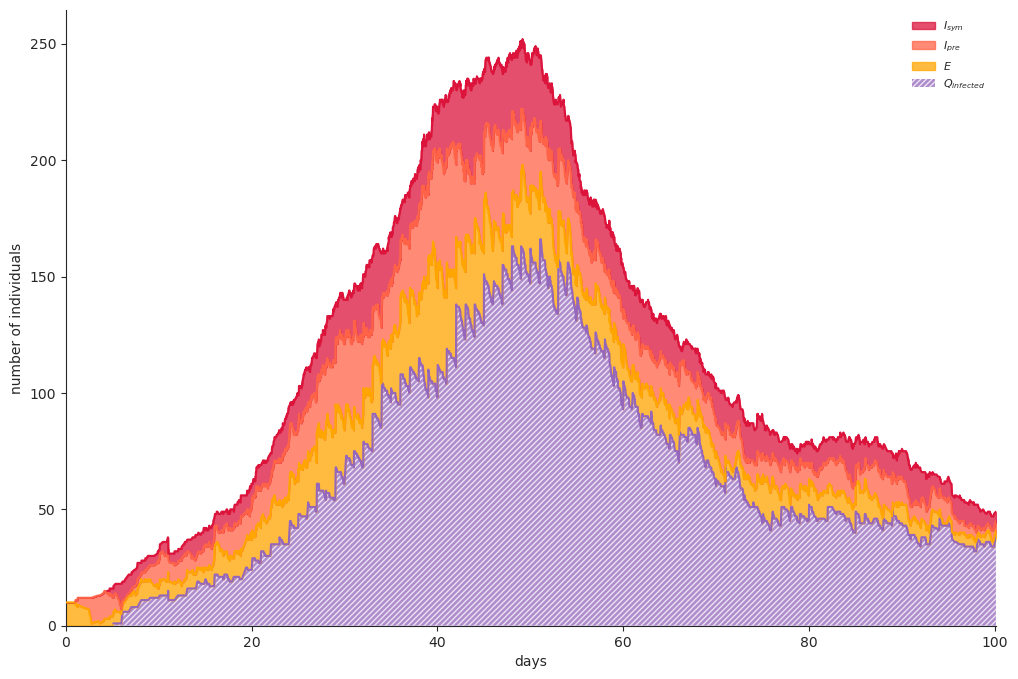

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [34]:
sim_correlated_2.model.figure_infections(plot_percentages=False)

Text(0.5, 1.0, 'Without weighted edges')

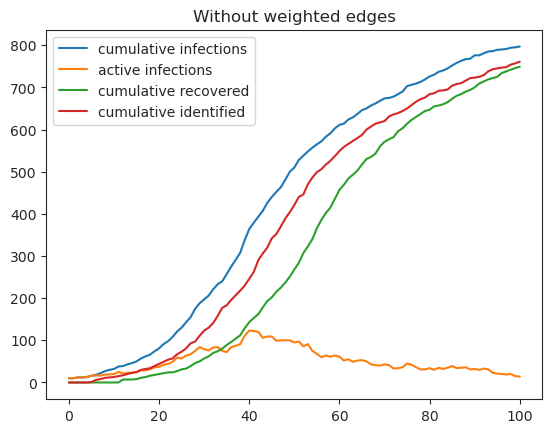

In [35]:
plt.plot([sim_correlated_2.overall_results[i]["cumInfections"] for i in range(len(sim_correlated_2.overall_results))], label="cumulative infections")
plt.plot([sim_correlated_2.overall_results[i]["numActiveInfections"] for i in range(len(sim_correlated_2.overall_results))], label="active infections")
plt.plot([sim_correlated_2.overall_results[i]["cumRecovered"] for i in range(len(sim_correlated_2.overall_results))], label="cumulative recovered")
plt.plot([sim_correlated_2.overall_results[i]["cum_positives_identified"] for i in range(len(sim_correlated_2.overall_results))], label="cumulative identified")

plt.legend()
plt.title('Without weighted edges')